<center>

# <span style="color:#FF5733;">Analyse de Données & Prédiction de la qualité des fruits</span>
## <span style="color:#FFC300;">ECE - École d'Ingénieurs Campus Lyon</span>
### <span style="color:#FF5733;">Projet Machine Learning, A.A. 2023/2024</span>

</center>

---

**Thème du Projet:** Exploration de la Qualité des Fruits à l'aide de l'Analyse de Données

**Objectif du Projet:** Utiliser les techniques de Machine Learning pour explorer et prédire la qualité des fruits à partir de données disponibles.

**Description du Projet:**

Ce projet utilise un jeu de données sur la qualité des fruits, incluant des attributs comme la taille, le poids, la douceur, la croquabilité, etc.

**Caractéristiques Principales:**
- A_id : Identifiant unique pour chaque fruit
- Taille : Taille du fruit
- Poids : Poids du fruit
- Douceur : Degré de douceur du fruit
- Croquabilité : Texture indiquant la croquabilité du fruit
- Jus : Niveau de jus du fruit
- Maturité : Stade de maturité du fruit
- Acidité : Niveau d'acidité du fruit
- Qualité : Qualité globale du fruit

**Cas d'Utilisation Potentiels:**
- Classification des Fruits
- Prédiction de la Qualité

Les données ont été fournies par une entreprise agricole américaine et sont disponibles sur Kaggle [ici](https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality).

---


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Importation des bibliothèques requises </div> 

In [95]:
import os # File system manangement
import time
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
from time import time
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# visulisation des données
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.express as px

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# Sklearn processing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler, OneHotEncoder,LabelEncoder
from sklearn.model_selection import  StratifiedShuffleSplit,ShuffleSplit,RepeatedStratifiedKFold,StratifiedKFold


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Import des bibliothèques nécessaires pour la réalisation du projet </div> 

In [4]:
# Spécifie le chemin du fichier CSV contenant les données 
Path = "/Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/apple_quality.csv"

# Charge les données à partir du fichier CSV en utilisant la bibliothèque pandas, en spécifiant le délimiteur comme la virgule.
data = pd.read_csv(Path, sep=',')

# Affiche les premières lignes du jeu de données pour obtenir un aperçu initial des données.
display(data.head())

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [5]:
# Affiche les dernieres lignes du jeu de données pour obtenir un aperçu initial des données.
display(data.tail())

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good
4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Created_by_Nidula_Elgiriyewithana,NaN


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Manipulation des données </div> 

#### 1. Calcul de la Dimension du Jeu de Données

In [6]:
# Affiche le nombre de lignes et de colonnes dans le jeu de données pour donner une première vue d'ensemble.
print("Le jeu de données d'entrée comporte {} lignes et {} colonnes".format(len(data), len(data.columns)))

Le jeu de données d'entrée comporte 4001 lignes et 9 colonnes


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Conclusion :</font></h3>

* Il y a un total de **4001 enregistrements** et **9 colonnes** disponibles dans le train_dataset.


#### 2. Résumé statistique du jeu de données  
* Calcul du nombre total de valeurs manquantes et du pourcentage de valeurs manquantes.

In [7]:
# Crée un DataFrame pour donner un aperçu des données de la DataFrame originale, colonne par colonne.
def creer_apercu_dataframe(data):
    '''
    Crée un DataFrame pour donner un aperçu des données de la DataFrame originale, colonne par colonne.
    Chaque ligne résultante fournit des informations sur chaque colonne :
    - type de données
    - spécimen de données
    - nombre de valeurs uniques
    - part des valeurs manquantes
    
    Args:
        data (DataFrame): La DataFrame avec laquelle travailler.
        
    Returns:
        DataFrame résultant        
    '''
    
    cols, dtype_col, specimens, nunique, null_share = [], [], [], [], []
    for column in data:
        cols.append(column)
        
        # Obtient le type de données de la colonne
        this_dtype = data[column].dtype
        dtype_col.append(this_dtype)
        
        # Obtient un spécimen de données de la colonne
        specimen = data.loc[data[column].first_valid_index(), column]
        specimens.append(specimen)
        
        # Obtient le nombre de valeurs uniques dans la colonne
        nunique.append(data[column].nunique())
        
        # Calcule la part des valeurs manquantes dans la colonne
        null_sum = data[column].isna().sum()
        null_to_len = null_sum / len(data[column])
        null_share.append(f'{null_to_len:.2%}')
        
    # Crée un DataFrame avec les informations collectées
    df = pd.DataFrame(list(zip(dtype_col,
                               specimens,
                               nunique,
                              null_share)),
                      index=cols)    
    df.columns=['dtype',
                'specimen',
                'Total No. unique Values',
               '% of Missing Values']
 
    return df


In [8]:
creer_apercu_dataframe(data)

,dtype,specimen,Total No. unique Values,% of Missing Values
A_id,float64,0.0,4000,0.02%
Size,float64,-3.970049,4000,0.02%
Weight,float64,-2.512336,4000,0.02%
Sweetness,float64,5.34633,4000,0.02%
Crunchiness,float64,-1.012009,4000,0.02%
Juiciness,float64,1.8449,4000,0.02%
Ripeness,float64,0.32984,4000,0.02%
Acidity,object,-0.491590483,4001,0.00%
Quality,object,good,2,0.02%


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Observations sur le Jeu de Données :</font></h3>

<p align="left">
    <strong>Observation 1:</strong> Aucune des attributs ne comporte de valeurs manquantes.
</p>

<p align="left">
    <strong>Observation 2:</strong> Le jeu de données se compose de 9 colonnes, pouvant être réparties en deux groupes distincts :
</p>

1. **Colonnes de Type Catégorique :** avec un type de données object
2. **Colonnes de Type Numérique :** avec un type de données float

<p align="left">
    <strong>Observation 3:</strong> Certaines colonnes présentent un faible nombre de valeurs distinctes.
</p>
    
<p align="left">
    <strong>Observation 4:</strong> La colonne cible "Quality" contient 2 categories différentes de classe.
</p>

<p align="left">
    <strong>Observation 5:</strong> La colonne 'Acidity' a un type de données 'object' qui ne reflète pas correctement son contenu réel.
</p>

#### 4. Controle des valeur manquantes dans le dataset

In [9]:
def visualize_nan_values(dataset):
    # Calculer le nombre de valeurs NaN et leur pourcentage pour chaque colonne
    nan_counts = dataset.isnull().sum()
    total_values = len(dataset)
    nan_percentage = (nan_counts / total_values) * 100
    
    # Créer un DataFrame avec les informations sur les valeurs NaN
    nan_info = pd.DataFrame({'Column': nan_counts.index, 'NaN Count': nan_counts.values, 'NaN Percentage': nan_percentage.values})
    
    # Visualiser les informations avec Plotly Express
    fig = px.bar(nan_info, x='Column', y='NaN Count', text='NaN Count', title='Nombre de valeurs NaN par colonne',
                 labels={'NaN Count': 'Nombre de valeurs NaN', 'Column': 'Colonne'}, color='Column')
    fig.update_traces(texttemplate='%{text}', textposition='outside')
    fig.update_layout(barmode='stack')

    # Afficher le graphique des barres seulement
    return fig


In [10]:
visualize_nan_values(data)

<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Observations sur le Jeu de Données:</font></h3>

* le jeu de données présente un une valeur manquante dans tous les colonnes sauf dans la colonne Acidity, donc nous allons retiré ces lignes. 

In [11]:
def remove_rows_with_missing_values(dataset):
    # Copie du dataset original pour éviter les modifications accidentelles
    dataset_copy = dataset.copy()
    
    # Nombre de lignes avant suppression
    num_rows_before = len(dataset_copy)
    
    # Suppression des lignes avec des valeurs manquantes
    dataset_copy.dropna(inplace=True)
    
    # Nombre de lignes après suppression
    num_rows_after = len(dataset_copy)
    
    # Contrôle pour vérifier si des lignes ont été supprimées
    if num_rows_before == num_rows_after:
        print("Aucune ligne avec des valeurs manquantes n'a été supprimée.")
    else:
        print(f"{num_rows_before - num_rows_after} ligne(s) avec des valeurs manquantes ont été supprimée(s).")
    
    # Retourner le nouveau dataset
    return dataset_copy


data_clean = remove_rows_with_missing_values(data)

# Convertir le type de données de la colonne 'Acidity' en float
data_clean['Acidity'] = data_clean['Acidity'].astype(float)

# Vérifier les nouveaux types de données de chaque colonne
print(data_clean.dtypes)

1 ligne(s) avec des valeurs manquantes ont été supprimée(s).
A_id           float64
Size           float64
Weight         float64
Sweetness      float64
Crunchiness    float64
Juiciness      float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object


#### 5. Vérification de la présence d'éventuels enregistrements en double.

In [12]:
def separation_doublons(data):
    # Vérifier la présence de doublons
    if data.duplicated().any():
        # Afficher le nombre de doublons
        print("Doublons dans le jeu de données : ", data.duplicated().sum())
        
        # Séparation des données en deux datasets : un sans doublons et l'autre avec tous les doublons
        data_sans_doublons = data.drop_duplicates()
        data_doublons_seuls = data[data.duplicated(keep=False)]
        
        # Calculer le pourcentage de doublons
        pourcentage_doublons = ( data.duplicated().sum() / len(data)) * 100
        
        # Afficher les informations
        print("Pourcentage de doublons : {:.2f}%".format(pourcentage_doublons))
        
        # Retourner les deux datasets
        return data_sans_doublons, data_doublons_seuls
    else:
        print("Aucun doublon dans le jeu de données.")
        return data, None

In [13]:
data_sans_doublons, data_doublons = separation_doublons(data_clean)


Aucun doublon dans le jeu de données.


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Observations sur le Jeu de Données:</font></h3>

* le jeu de données présente un pourcentage de doublons équivalent à 0.00%  

#### 5. Séparons les variables numériques et catégorielles

In [14]:
# Définition de la fonction pour séparer les variables numériques et catégorielles
def separer_variables_numeriques_et_categorielles(data):
    # Partie 1 : Séparation des variables numériques
    donnees_numeriques = data.select_dtypes(include=[np.number]).copy()
    
    # Affichage de la partie numérique
    print("Partie 1. Numérique")
    
    # Affichage du nombre de colonnes numériques
    print('Nombre de colonnes numériques :', donnees_numeriques.shape[1])
    
    # Affichage des colonnes numériques avec des points (•)
    print("Colonnes numériques : ")
    for col in donnees_numeriques.columns:
        print(f"• {col}")

    # Saut de ligne pour la clarté
    print("")

    # Partie 2 : Séparation des variables catégorielles
    donnees_categorielles = data.select_dtypes(exclude=[np.number]).copy()
    
    # Affichage de la partie catégorique
    print("Partie 2. Catégorique")
    
    # Affichage du nombre de colonnes catégoriques
    print('Nombre de colonnes catégoriques :', donnees_categorielles.shape[1])
    
    # Affichage des colonnes catégoriques avec des points (•)
    print("Colonnes catégoriques : ")
    for col in donnees_categorielles.columns:
        print(f"• {col}")

    # Retourne les deux datasets séparés
    return donnees_numeriques, donnees_categorielles

numeriques, categoriques = separer_variables_numeriques_et_categorielles(data_clean)

Partie 1. Numérique
Nombre de colonnes numériques : 8
Colonnes numériques : 
• A_id
• Size
• Weight
• Sweetness
• Crunchiness
• Juiciness
• Ripeness
• Acidity

Partie 2. Catégorique
Nombre de colonnes catégoriques : 1
Colonnes catégoriques : 
• Quality


#### 6. Réalisation d'une Analyse Descriptive

In [15]:
# Calcul des statistiques descriptives arrondies à deux décimales pour chaque colonne du DataFrame
descriptive_stats = data_clean.describe().round(2)

# Transposer les résultats pour une meilleure lisibilité
transposed_stats = descriptive_stats.T

# Affichage des statistiques descriptives arrondies
display(transposed_stats)

,count,mean,std,min,25%,50%,75%,max
A_id,4000.0,1999.50,1154.84,0.00,999.75,1999.50,2999.25,3999.00
Size,4000.0,-0.50,1.93,-7.15,-1.82,-0.51,0.81,6.41
Weight,4000.0,-0.99,1.60,-7.15,-2.01,-0.98,0.03,5.79
Sweetness,4000.0,-0.47,1.94,-6.89,-1.74,-0.50,0.80,6.37
Crunchiness,4000.0,0.99,1.40,-6.06,0.06,1.00,1.89,7.62
Juiciness,4000.0,0.51,1.93,-5.96,-0.80,0.53,1.84,7.36
Ripeness,4000.0,0.50,1.87,-5.86,-0.77,0.50,1.77,7.24
Acidity,4000.0,0.08,2.11,-7.01,-1.38,0.02,1.51,7.40


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color="brown"> 🔍 Inférence :</font></h3>

* Size minimum est de -7.15 et le poids maximum est de 6.41 donc les valeurs de cette colonne peuvent etre positive comme négative.
* Weight minimum est de -7.15 et le poids maximum est de 5.79.
* Sweetness minimum est de ?? et le poids maximum est de ??.


#### 7. Réalisation d'une Analyse Descriptive sur les Attributs Catégoriels.

In [16]:
def separer_colonnes_par_valeurs_distinctes(data, max_valeurs_distinctes):
    colonnes_liste = [x for x in list(data.columns) if x not in ['Id','JWMNP']]
    colonnes_avec_max_valeurs_distinctes = []
    colonnes_avec_plus_de_max_valeurs_distinctes = []

    for fonctionnalite in colonnes_liste:
        valeurs_distinctes = data[fonctionnalite].nunique()
        if valeurs_distinctes <= max_valeurs_distinctes:
            colonnes_avec_max_valeurs_distinctes.append((fonctionnalite, valeurs_distinctes))
        else:
            colonnes_avec_plus_de_max_valeurs_distinctes.append((fonctionnalite, valeurs_distinctes))

    return colonnes_avec_max_valeurs_distinctes, colonnes_avec_plus_de_max_valeurs_distinctes

# Exemple d'utilisation : séparer les colonnes avec un maximum de 15 valeurs distinctes
max_valeurs_distinctes = 15
colonnes_avec_max_valeurs_distinctes, colonnes_avec_plus_de_max_valeurs_distinctes = separer_colonnes_par_valeurs_distinctes(data_clean, max_valeurs_distinctes)

# Afficher les résultats
print(f"Colonnes avec moins de {max_valeurs_distinctes} valeurs distinctes :")
for col, num_unique in colonnes_avec_max_valeurs_distinctes:
    print(f"{col} ({num_unique} valeurs distinctes)")

print("\nColonnes avec plus de 15 valeurs distinctes :")
for col, num_unique in colonnes_avec_plus_de_max_valeurs_distinctes:
    print(f"{col} ({num_unique} valeurs distinctes)")


Colonnes avec moins de 15 valeurs distinctes :
Quality (2 valeurs distinctes)

Colonnes avec plus de 15 valeurs distinctes :
A_id (4000 valeurs distinctes)
Size (4000 valeurs distinctes)
Weight (4000 valeurs distinctes)
Sweetness (4000 valeurs distinctes)
Crunchiness (4000 valeurs distinctes)
Juiciness (4000 valeurs distinctes)
Ripeness (4000 valeurs distinctes)
Acidity (4000 valeurs distinctes)


In [17]:
data_clean

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...,...
3995,3995.0,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


#### 8. Analyse des Valeurs Uniques de Attribut Catégoriel Quality.

In [18]:
colonne = 'Quality'
print(f"\nInformations pour la colonne {colonne}:")
display(data_clean[colonne].value_counts().rename_axis('unique').reset_index(name='count'))


Informations pour la colonne Quality:


,unique,count
0,good,2004
1,bad,1996


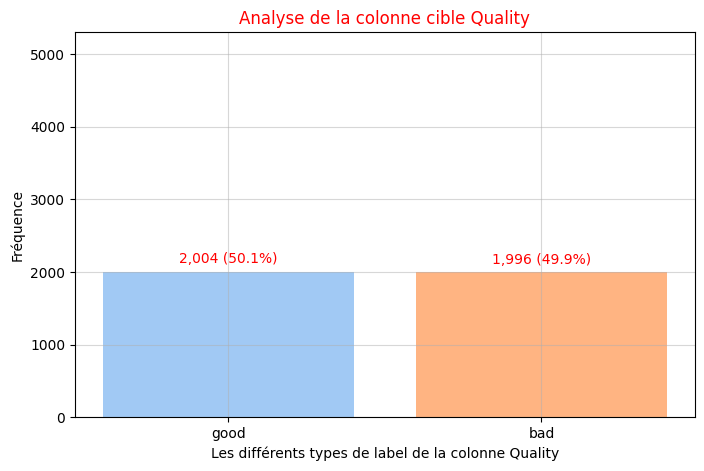

In [19]:
plt.figure(figsize=(8, 5))

plt.xticks(rotation=0)
counts = data_clean.Quality.value_counts()
bars = plt.bar(counts.index, counts.values, color=sns.color_palette("pastel"))

# Formater le nombre avec des virgules et l'afficher au-dessus des barres
for bar in bars:
    hauteur = bar.get_height()
    pourcentage = (hauteur / len(data_clean)) * 100  # Calcul du pourcentage
    plt.text(bar.get_x() + bar.get_width()/2, hauteur + 80, f"{hauteur:,.0f} ({pourcentage:.1f}%)", ha='center', va='bottom', color='red')

plt.xlabel('Les différents types de label de la colonne Quality')
plt.ylabel('Fréquence')
plt.title('Analyse de la colonne cible Quality', color='red')

# Afficher à la fois les lignes de grille horizontales et verticales
plt.grid(axis='both', linestyle='-', alpha=0.5)
plt.ylim(0, 5300)
plt.show()


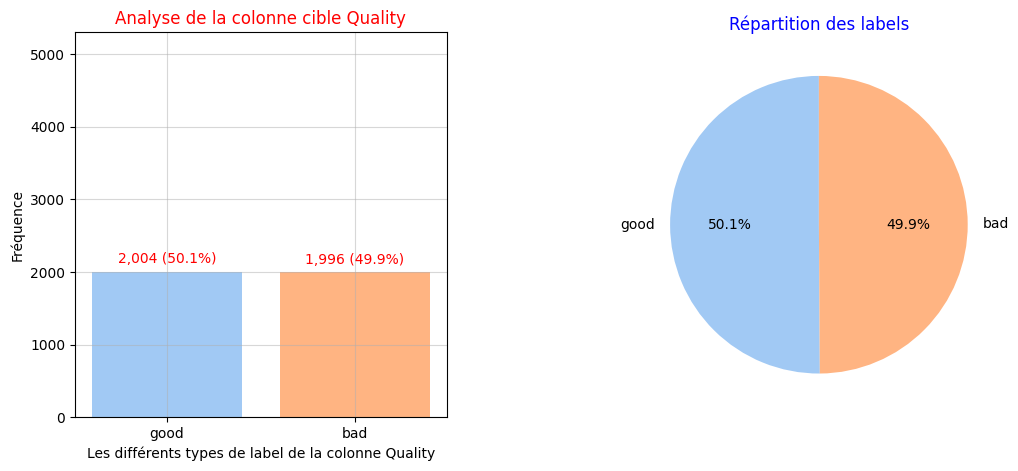

In [20]:
# Créer une figure avec deux sous-graphiques
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Premier sous-graphique : bar chart
ax1.bar(counts.index, counts.values, color=sns.color_palette("pastel"))

# Formater le nombre avec des virgules et l'afficher au-dessus des barres
for bar in ax1.patches:
    hauteur = bar.get_height()
    pourcentage = (hauteur / len(data_clean)) * 100  # Calcul du pourcentage
    ax1.text(bar.get_x() + bar.get_width()/2, hauteur + 80, f"{hauteur:,.0f} ({pourcentage:.1f}%)", ha='center', va='bottom', color='red')

ax1.set_xlabel('Les différents types de label de la colonne Quality')
ax1.set_ylabel('Fréquence')
ax1.set_title('Analyse de la colonne cible Quality', color='red')

# Afficher à la fois les lignes de grille horizontales et verticales
ax1.grid(axis='both', linestyle='-', alpha=0.5)
ax1.set_ylim(0, 5300)

# Deuxième sous-graphique : pie chart
ax2.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))

ax2.set_title('Répartition des labels', color='blue')

# Ajustement de l'espacement entre les deux sous-graphiques
plt.subplots_adjust(wspace=0.5)

plt.show()


In [21]:
# Analyse la colonne 'Quality' et compte les occurrences de chaque catégorie
#category_counts = data_clean['Quality'].value_counts()

# Crée un DataFrame à partir des comptages
#category_counts_df = pd.DataFrame(category_counts).reset_index()

# Renomme les colonnes pour plus de clarté
#category_counts_df.columns = ['Quality', 'count']

# Crée un graphique donut avec Plotly Express
#fig = px.pie(category_counts_df, values='count', names='Quality', hole=0.5)

# Met à jour la disposition pour ressembler à un graphique donut
#fig.update_traces(textposition='inside', textinfo='percent+label')

# Ajoute l'information demandée à gauche du graphique avec une taille augmentée
#fig.add_annotation(
#    text="Analyse de la colonne Quality ",
#    x=0.1,
#    y=0.7,
#    showarrow=False,
#    font=dict(size=16)  # Augmente la taille du texte
#)

# Affiche le graphique
#fig.show()


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color="brown"> 🔍 Inférence :</font></h3>

* La colonne cible **Quality** présente deux types de labels : **good** et **bad**.
* On observe une légère déséquilibre dans la répartition de chaque label au sein de la colonne cible.


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman ; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Analyse exploratoire des données (EDA) </div> 

#### 1. Visualisation de la distribution de chaque classe de NObeyesdad.

In [22]:
background_color = '#CCFF80'
color_palette=['#2769FE', '#FF5F57', '#4dad82', '#230F88', '#0E0330']


numerical_features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']
target = ['Quality']


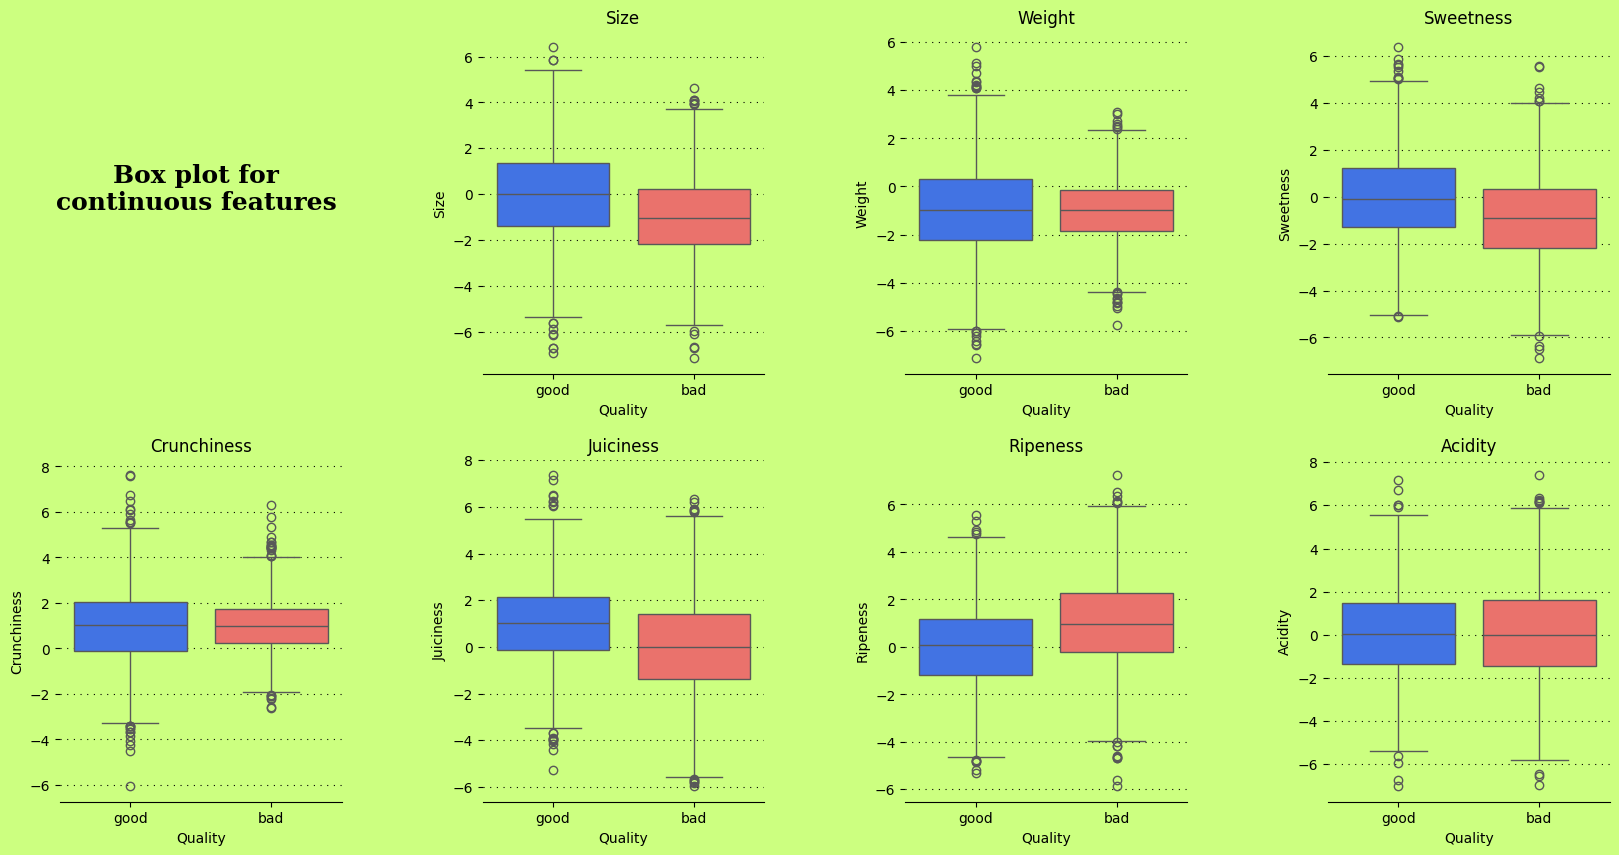

In [23]:
fig = plt.figure(figsize=(20, 10))
fig.patch.set_facecolor(background_color) 
gs = fig.add_gridspec(2, 4)
gs.update(wspace=0.5, hspace=0.25)
axes = [fig.add_subplot(gs[i//4, i%4]) for i in range(1, 8)]

ax_title = fig.add_subplot(gs[0, 0])
ax_title.text(0.5, 0.5, 'Box plot for \ncontinuous features \n',
              horizontalalignment='center', verticalalignment='center',
              fontsize=18, fontweight='bold', fontfamily='serif', color="#000000")
ax_title.set_xticks([])
ax_title.set_yticks([])
ax_title.set_facecolor(background_color)
for spine in ax_title.spines.values():
    spine.set_visible(False)

for ax, feature in zip(axes, numerical_features):
    sns.boxplot(x='Quality', y=feature, data=data_clean, ax=ax, palette=color_palette)
    ax.set_title(feature)
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    ax.set_facecolor(background_color)
    for s in ["top","right","left"]:
        ax.spines[s].set_visible(False)

plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Conclusion:</font></h3>

* Toutes les colonnes de type numerique presentent des valeurs aberantes.

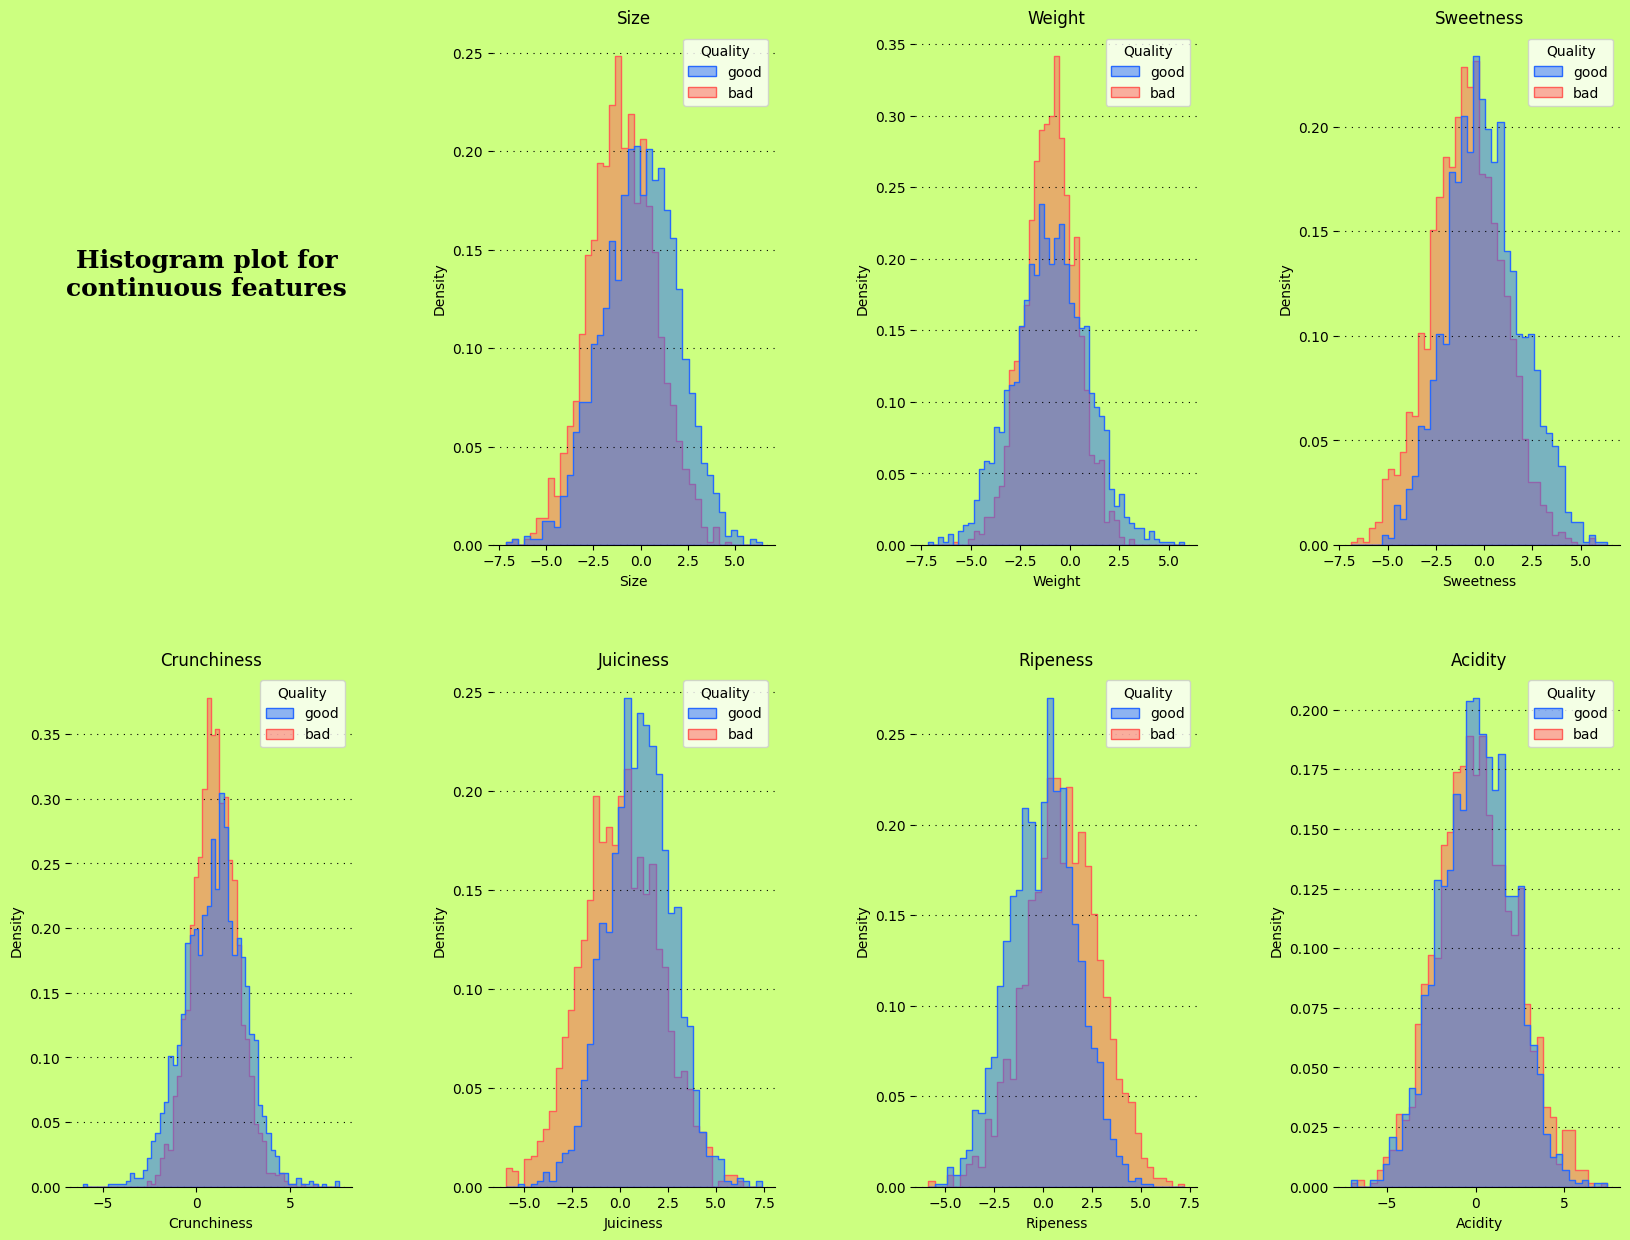

In [24]:
fig = plt.figure(figsize=(20, 15))
fig.patch.set_facecolor(background_color) 
gs = fig.add_gridspec(2, 4)
gs.update(wspace=0.5, hspace=0.25)
axes = [fig.add_subplot(gs[i//4, i%4]) for i in range(1, 8)]

ax_title = fig.add_subplot(gs[0, 0])
ax_title.text(0.5, 0.5, 'Histogram plot for \ncontinuous features \n',
              horizontalalignment='center', verticalalignment='center',
              fontsize=18, fontweight='bold', fontfamily='serif', color="#000000")
ax_title.set_xticks([])
ax_title.set_yticks([])
ax_title.set_facecolor(background_color)
for spine in ax_title.spines.values():
    spine.set_visible(False)

for ax, feature in zip(axes, numerical_features):
    sns.histplot(data=data_clean, x=feature, hue='Quality', element="step", stat="density", common_norm=False, ax=ax, palette=color_palette, alpha=0.5)
    ax.set_title(feature)
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
    ax.xaxis.grid(False)
    ax.set_facecolor(background_color)
    for s in ["top","right","left"]:
        ax.spines[s].set_visible(False)


plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Conclusion:</font></h3>

* Toutes les colonnes de type numerique presentent une distribution presque normal.


#### 17.  Détection et Traitement des Valeurs Aberrantes

In [25]:
def get_iqr_values_Specifying_quartile(df_in, col_name,first_quartile,third_quartile):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(first_quartile) # xth percentile / 1st quartile
    q3 = df_in[col_name].quantile(third_quartile) # yth percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-(1.5*iqr) # The minimum value or the |- marker in the box plot
    maximum = q3+(1.5*iqr) # The maximum value or the -| marker in the box plot
    return median, q1, q3, iqr, minimum, maximum

def count_outliers_Specifying_quartile(df_in, col_name, first_quartile, third_quartile):
    _, _, _, _, minimum, maximum = get_iqr_values_Specifying_quartile(df_in, col_name, first_quartile, third_quartile)
    df_outliers = df_in.loc[(df_in[col_name] <= minimum) | (df_in[col_name] >= maximum)]
    return df_outliers.shape[0]

def detect_and_count_outliers(df_in, list_des_colonnes, first_quartile, third_quartile):
    result_data = []
    for col_name in list_des_colonnes:
        outlier_count = count_outliers_Specifying_quartile(df_in, col_name, first_quartile, third_quartile)
        total_count = len(df_in)
        outlier_percentage = round((outlier_count / total_count) * 100,2)
        result_data.append([col_name, outlier_count, outlier_percentage])
    
    result_df = pd.DataFrame(result_data, columns=['Column Name', 'Number of Outliers', 'Percentage of Outliers(%)'])
    return result_df

def visualize_outliers(df):
    fig = px.bar(df, x='Column Name', y='Number of Outliers',
                 labels={'Column Name': 'Nom de la colonne', 'Number of Outliers': 'Nombre de valeurs aberrantes'},
                 title='Nombre de valeurs aberrantes par colonne')
    fig.show()

In [26]:
first_quartile, third_quartile = 0.25, 0.75
df_outliers_info = detect_and_count_outliers(data_clean, numerical_features, first_quartile, third_quartile)
display(df_outliers_info)
# visualize_outliers(df_outliers_info)

,Column Name,Number of Outliers,Percentage of Outliers(%)
0,Size,22,0.55
1,Weight,54,1.35
2,Sweetness,32,0.80
3,Crunchiness,47,1.18
4,Juiciness,32,0.80
5,Ripeness,24,0.60
6,Acidity,20,0.50


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Conclusion:</font></h3>
    
* L'analyse des valeurs aberrantes dans nos données numériques montre qu'elles sont présentes dans toutes les colonnes, bien que leur fréquence ne soit pas très élevée.

## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Correlation Matrix </div> 

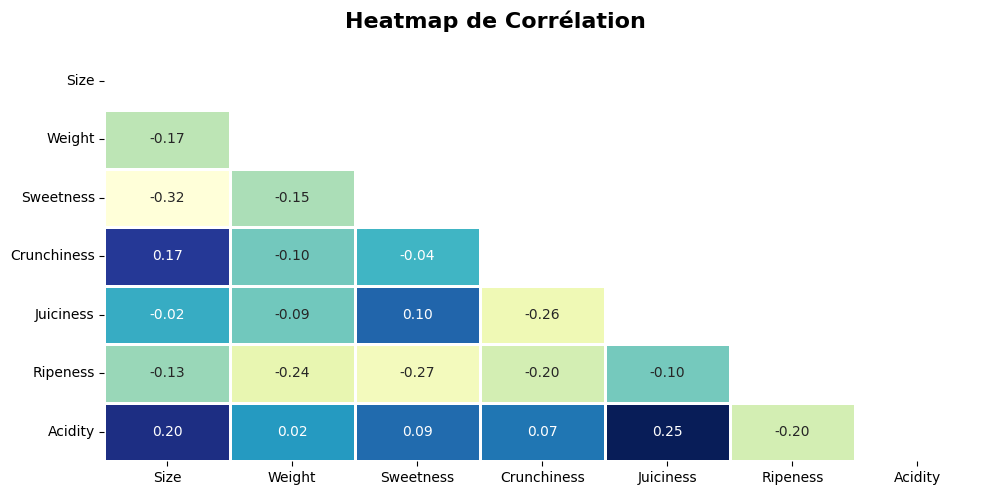

In [27]:
corr = data_clean[numerical_features].corr(method='pearson')
mask = np.triu(np.ones_like(corr))
fig = plt.subplots(figsize=(10,5))
sns.heatmap(corr, annot=True, fmt='.2f', mask=mask, cmap='YlGnBu', cbar=None, linewidth=1)
plt.suptitle('Heatmap de Corrélation', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Conclusion:</font></h3>

* Aucune des colonnes numériques ne présente de corrélation significative entre elles, ce qui pourrait entraîner des erreurs lors de la phase d'entraînement du modèle de classification.

## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman ; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Split dataset in train et test set </div> 

<div style="text-align:center">
  <div style="float:right; margin-left: 20px;">
    <img src="4_train-test-split.jpg" alt="Gas Turbine" width="800"/>
  </div>
</div>

In [28]:
def split_data(X, y, threshold_test=0.2, random_state=200):
    """
    Divise les données en ensembles d'entraînement et de test.

    Paramètres :
    - X : Features du jeu de données.
    - y : Valeurs cibles du jeu de données.
    - threshold_test : Taille du jeu de données de test (par défaut : 0.2).
    - random_state : Seed pour la reproductibilité (par défaut : 200).

    Retourne :
    - X_train : Features du jeu de données d'entraînement.
    - X_test : Features du jeu de données de test.
    - y_train : Valeurs cibles du jeu de données d'entraînement.
    - y_test : Valeurs cibles du jeu de données de test.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=threshold_test, stratify=y, shuffle=True, random_state=random_state)
    return X_train, X_test, y_train, y_test

In [29]:
def print_dataset_info(X_train, X_test, y_train, y_test):
    """
    Imprime des informations sur les dimensions et les classes des ensembles de données d'entrée.

    Paramètres :
    - X_train, X_test : Matrices de caractéristiques pour l'entraînement et le test.
    - y_train, y_test : Vecteurs cibles pour l'entraînement et le test.
    """
    # Imprime les dimensions de X_train, X_test, y_train et y_test
    print("")
    print(f"Dimensions de X_train : {X_train.shape}")
    print(f"Dimensions de X_test  : {X_test.shape}")
    print(f"Dimensions de y_train : {y_train.shape}")
    print(f"Dimensions de y_test  : {y_test.shape}")
    print("")

    # Imprime le nombre de classes uniques dans y_train et y_test
    num_classes_train = len(np.unique(y_train))
    num_classes_test = len(np.unique(y_test))
    print(f"Nombre de classes uniques dans y_train : {num_classes_train}")
    print(f"Nombre de classes uniques dans y_test : {num_classes_test}")
    print("")

    # Imprime le nombre d'instances par classe dans y_train et y_test
    for class_label in np.unique(y_train):
        instances_train = np.sum(y_train.values == class_label)
        instances_test = np.sum(y_test.values == class_label)
        print(f"Classe {class_label}: Instances d'entraînement - {instances_train}, Instances de test - {instances_test}") 

In [30]:
X, y = data_clean[numerical_features], data_clean[target]
# Utilisation de la fonction pour diviser les données et afficher les informations
X_train, X_test, y_train, y_test = split_data(X, y, threshold_test=0.25, random_state=200)
print_dataset_info(X_train, X_test, y_train, y_test)


Dimensions de X_train : (3000, 7)
Dimensions de X_test  : (1000, 7)
Dimensions de y_train : (3000, 1)
Dimensions de y_test  : (1000, 1)

Nombre de classes uniques dans y_train : 2
Nombre de classes uniques dans y_test : 2

Classe bad: Instances d'entraînement - 1497, Instances de test - 499
Classe good: Instances d'entraînement - 1503, Instances de test - 501


In [31]:
# https://bait509-ubc.github.io/BAIT509/lectures/lecture2.html

## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Construire un modèle de Réseau de Neurones Artificiels pour notre problème de classification. </div>

### 1.1 Construction du modèle : Réseau de neurones utilisant TensorFlow

<div style="text-align:center">
  <div style="float:right; margin-left: 20px;">
    <img src="/Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/An-illustration-to-show-a-dense-neural-network-with-3-fully-connected-layers-Adapted.png" alt="Gas Turbine" width="900" height="400"/>
  </div>
</div>

In [32]:
# Importations nécessaires
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.metrics import f1_score

def create_nn_model(input_shape, num_classes):
    """
    Fonction pour créer un modèle de réseau de neurones.

    Args:
    - input_shape: Tuple spécifiant la forme des données d'entrée
    - num_classes: Nombre de classes pour la classification

    Returns:
    - nn_model: Modèle de réseau de neurones
    """

    # Création d'un modèle séquentiel
    nn_model = tf.keras.Sequential(name='Quality_prediction_model')

    # Couche d'entrée pour spécifier la forme des données
    nn_model.add(Input(input_shape))

    # Couches cachées avec régularisation L2 pour éviter le surapprentissage
    nn_model.add(Dense(units=256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0005)))
    #nn_model.add(Dense(units=256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0005)))
    #nn_model.add(Dense(units=256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0005)))
    #nn_model.add(Dense(units=256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0005)))
    #nn_model.add(Dense(units=256, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.0005)))

    # Couche de sortie avec une fonction d'activation softmax pour la classification
    nn_model.add(Dense(num_classes, activation='softmax'))
    
    return nn_model

# Définition de la fonction F1-score comme métrique personnalisée : Fonction de métrique personnalisée pour F1-score macro
def f1_macro(y_true, y_pred):
    y_pred = tf.argmax(y_pred, axis=1)
    f1 = f1_score(y_true, y_pred, average='macro')
    return f1

In [33]:
from sklearn.preprocessing import LabelEncoder

def encode_labels(y_train, y_test):
    # Initialiser un objet LabelEncoder
    label_encoder = LabelEncoder()

    # Adapter l'encodeur aux étiquettes d'entraînement et encoder les étiquettes
    labels_encoded_train = label_encoder.fit_transform(y_train)
    labels_encoded_test = label_encoder.transform(y_test)

    return labels_encoded_train, labels_encoded_test, label_encoder

def decode_labels(label_encoder, labels_encoded):
    # Utiliser l'objet LabelEncoder pour décoder les étiquettes
    labels_decoded = label_encoder.inverse_transform(labels_encoded)
    return labels_decoded


In [34]:
def compile_nn_model(input_shape, num_classes):

    # Création du modèle de réseau de neurones en utilisant la fonction create_nn_model
    nn_model = create_nn_model(input_shape,num_classes)

    # Affichage d'un résumé du modèle
    nn_model.summary()

    # Définition de la planification du taux d'apprentissage
    lr_schedule = ExponentialDecay(
        initial_learning_rate=1e-3,     # Taux d'apprentissage initial
        decay_steps=10000,              # Nombre d'étapes pour réduire le taux d'apprentissage
        decay_rate=0.5,                 # Taux de réduction du taux d'apprentissage
        staircase=False                 # Si True, la mise à jour du taux est discrète, sinon continue
    )

    # Compilation du modèle avec l'optimiseur Adam et la fonction de perte 'sparse_categorical_crossentropy' 
    # Categorical Cross Entropy vs Sparse Categorical Cross Entropy 
    # https://sanjivgautamofficial.medium.com/categorical-cross-entropy-vs-sparse-categorical-cross-entropy-b6a24de2b7f0

    # Création de la fonction de perte SparseCategoricalCrossentropy
    # - from_logits=False : Les sorties sont des probabilités (non des logits)
    # - ignore_class=None : Aucune classe n'est ignorée lors du calcul de la perte
    # - reduction=tf.keras.losses.Reduction.AUTO : Utilisation de la réduction automatique de la perte
    # - name='sparse_categorical_crossentropy' : Nom de la fonction de perte
    loss_function = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=False,                  # Les sorties sont des probabilités
        ignore_class=None,                  # Aucune classe n'est ignorée
        reduction=tf.keras.losses.Reduction.AUTO,  # Utilise une réduction automatique
        name='sparse_categorical_crossentropy'  # Nom de la fonction de perte
    )

    # Configuration du callback pour sauvegarder les meilleurs modèles
    model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath='/Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/',   # Chemin où sauvegarder les modèles
        save_weights_only=False,       # Si True, sauvegarde uniquement les poids, sinon le modèle entier
        monitor='val_accuracy',        # Métrique à surveiller pour la sauvegarde
        mode='max',                    # Mode de sauvegarde (maximiser la métrique)
        save_best_only=True            # Ne sauvegarde que le meilleur modèle selon la métrique
    )

    # Compilation du modèle avec la fonction de perte configurée et les métriques 'accuracy' et 'f1_metric'
    nn_model.compile(
        optimizer=Adam(lr_schedule),    # Optimiseur Adam avec la planification du taux d'apprentissage
        loss=loss_function,             # Fonction de perte configurée
        metrics=['accuracy'] # Métriques à utiliser pour l'évaluation du modèle
    )

    return nn_model,model_checkpoint_callback


In [35]:
def plot_loss_accuracy(results):
    # Création de la figure avec 1 ligne et 2 colonnes pour les sous-graphiques
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plotting Loss
    axes[0].plot(results.history['loss'], color='teal', label='Training Loss')
    axes[0].plot(results.history['val_loss'], color='orange', label='Validation Loss')
    axes[0].set_title('Loss', fontsize=20)
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()

    # Plotting Accuracy
    axes[1].plot(results.history['accuracy'], color='teal', label='Training Accuracy')
    axes[1].plot(results.history['val_accuracy'], color='orange', label='Validation Accuracy')
    axes[1].set_title('Accuracy', fontsize=20)
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()

    # Ajustement automatique de la disposition des sous-graphiques pour un affichage propre
    plt.tight_layout()

    # Affichage du graphique
    plt.show()



In [36]:
# Spécifier la forme des données d'entrée et le nombre de classes
input_shape = (X_train.shape[1],)  # Taille de chaque image dans X_train
num_classes = len(np.unique(y_train))  # Nombre de classes uniques dans y_train

# Afficher les informations sur les données
print(f"Forme des données d'entrée (input_shape) : {input_shape}")
print(f"Nombre de classes uniques dans y_train : {num_classes}")

# Utilisation de la fonction pour créer le modèle
nn_model,model_checkpoint_callback = compile_nn_model(input_shape, num_classes)

labels_encoded_train, labels_encoded_test, label_encoder = encode_labels(y_train, y_test)

# Utilisation de la fonction decode_labels avec votre objet LabelEncoder et les étiquettes encodées
# labels_decoded_test = decode_labels(label_encoder, labels_encoded_test)

# Déterminer les dimensions de votre jeu de données
batch_size = 100  # Peut ajuster en fonction de la mémoire disponible
num_epochs = 150  # Peut ajuster en fonction de la convergence

# Entraînement du modèle de réseau de neurones
# X_train : données d'entraînement
# y_train : étiquettes de classe correspondantes pour les données d'entraînement
# X_test : données de validation
# y_train : étiquettes de classe correspondantes pour les données de validation
# batch_size : nombre de données d'entraînement utilisées à chaque étape de l'entraînement
# epochs : nombre d'itérations sur l'ensemble des données d'entraînement
# verbose : affiche des informations pendant l'entraînement (0 : silencieux, 1 : barre de progression, 2 : une ligne par époque)

results = nn_model.fit(X_train,labels_encoded_train,                  # Données d'entraînement
                       validation_data=(X_test,labels_encoded_test),  # Données de validation
                       batch_size=batch_size,            # Nombre d'échantillons à traiter à chaque étape de l'entraînement
                       epochs=num_epochs,                # Nombre d'itérations sur l'ensemble des données
                       verbose=1,                        # Affichage détaillé des informations pendant l'entraînement
                       callbacks=[model_checkpoint_callback])    # Liste des callbacks, incluant ModelCheckpoint


Forme des données d'entrée (input_shape) : (7,)
Nombre de classes uniques dans y_train : 2
Model: "Quality_prediction_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 2562 (10.01 KB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/150
 1/30 [>.............................] - ETA: 7s - loss: 0.7670 - accuracy: 0.4700

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 1s 18ms/step - loss: 0.5575 - accuracy: 0.7213 - val_loss: 0.4550 - val_accuracy: 0.8030
Epoch 2/150
 1/30 [>.............................] - ETA: 0s - loss: 0.5283 - accuracy: 0.7400INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 10ms/step - loss: 0.4155 - accuracy: 0.8220 - val_loss: 0.4045 - val_accuracy: 0.8330
Epoch 3/150
 1/30 [>.............................] - ETA: 0s - loss: 0.3746 - accuracy: 0.8200INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.3730 - accuracy: 0.8440 - val_loss: 0.3772 - val_accuracy: 0.8410
Epoch 4/150
 1/30 [>.............................] - ETA: 0s - loss: 0.3480 - accuracy: 0.8500INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.3479 - accuracy: 0.8527 - val_loss: 0.3596 - val_accuracy: 0.8570
Epoch 5/150
 1/30 [>.............................] - ETA: 0s - loss: 0.3363 - accuracy: 0.8500INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 13ms/step - loss: 0.3325 - accuracy: 0.8570 - val_loss: 0.3479 - val_accuracy: 0.8630
Epoch 6/150
 1/30 [>.............................] - ETA: 0s - loss: 0.3876 - accuracy: 0.8300INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.3190 - accuracy: 0.8663 - val_loss: 0.3402 - val_accuracy: 0.8660
Epoch 7/150
30/30 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8700 - val_loss: 0.3355 - val_accuracy: 0.8660
Epoch 8/150
 1/30 [>.............................] - ETA: 0s - loss: 0.2368 - accuracy: 0.9300INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.3016 - accuracy: 0.8753 - val_loss: 0.3269 - val_accuracy: 0.8740
Epoch 9/150
30/30 [==============================] - 0s 2ms/step - loss: 0.2956 - accuracy: 0.8783 - val_loss: 0.3285 - val_accuracy: 0.8680
Epoch 10/150
30/30 [==============================] - 0s 2ms/step - loss: 0.2909 - accuracy: 0.8770 - val_loss: 0.3244 - val_accuracy: 0.8710
Epoch 11/150
 1/30 [>.............................] - ETA: 0s - loss: 0.2808 - accuracy: 0.9000INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.2861 - accuracy: 0.8807 - val_loss: 0.3147 - val_accuracy: 0.8770
Epoch 12/150
 1/30 [>.............................] - ETA: 0s - loss: 0.2512 - accuracy: 0.9100INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.2814 - accuracy: 0.8833 - val_loss: 0.3138 - val_accuracy: 0.8820
Epoch 13/150
30/30 [==============================] - 0s 2ms/step - loss: 0.2776 - accuracy: 0.8813 - val_loss: 0.3134 - val_accuracy: 0.8790
Epoch 14/150
 1/30 [>.............................] - ETA: 0s - loss: 0.3764 - accuracy: 0.9000INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.2735 - accuracy: 0.8883 - val_loss: 0.3090 - val_accuracy: 0.8860
Epoch 15/150
30/30 [==============================] - 0s 2ms/step - loss: 0.2698 - accuracy: 0.8870 - val_loss: 0.3061 - val_accuracy: 0.8830
Epoch 16/150
30/30 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.8873 - val_loss: 0.3043 - val_accuracy: 0.8860
Epoch 17/150
30/30 [==============================] - 0s 1ms/step - loss: 0.2624 - accuracy: 0.8920 - val_loss: 0.3036 - val_accuracy: 0.8830
Epoch 18/150
30/30 [==============================] - 0s 2ms/step - loss: 0.2590 - accuracy: 0.8920 - val_loss: 0.3023 - val_accuracy: 0.8860
Epoch 19/150
 1/30 [>.............................] - ETA: 0s - loss: 0.2926 - accuracy: 0.8800INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.2559 - accuracy: 0.8957 - val_loss: 0.2971 - val_accuracy: 0.8890
Epoch 20/150
 1/30 [>.............................] - ETA: 0s - loss: 0.2612 - accuracy: 0.8800INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.2539 - accuracy: 0.8980 - val_loss: 0.2956 - val_accuracy: 0.8910
Epoch 21/150
30/30 [==============================] - 0s 2ms/step - loss: 0.2512 - accuracy: 0.8990 - val_loss: 0.2981 - val_accuracy: 0.8870
Epoch 22/150
 1/30 [>.............................] - ETA: 0s - loss: 0.2701 - accuracy: 0.8500INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.2479 - accuracy: 0.9010 - val_loss: 0.2922 - val_accuracy: 0.8950
Epoch 23/150
30/30 [==============================] - 0s 3ms/step - loss: 0.2469 - accuracy: 0.8967 - val_loss: 0.2935 - val_accuracy: 0.8910
Epoch 24/150
30/30 [==============================] - 0s 2ms/step - loss: 0.2428 - accuracy: 0.9017 - val_loss: 0.2932 - val_accuracy: 0.8910
Epoch 25/150
30/30 [==============================] - 0s 2ms/step - loss: 0.2409 - accuracy: 0.9000 - val_loss: 0.2881 - val_accuracy: 0.8950
Epoch 26/150
 1/30 [>.............................] - ETA: 0s - loss: 0.1838 - accuracy: 0.9200INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 10ms/step - loss: 0.2394 - accuracy: 0.9010 - val_loss: 0.2865 - val_accuracy: 0.8960
Epoch 27/150
30/30 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.9037 - val_loss: 0.2862 - val_accuracy: 0.8950
Epoch 28/150
30/30 [==============================] - 0s 1ms/step - loss: 0.2339 - accuracy: 0.9040 - val_loss: 0.2868 - val_accuracy: 0.8950
Epoch 29/150
 1/30 [>.............................] - ETA: 0s - loss: 0.2003 - accuracy: 0.9500INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.2319 - accuracy: 0.9053 - val_loss: 0.2846 - val_accuracy: 0.8970
Epoch 30/150
30/30 [==============================] - 0s 2ms/step - loss: 0.2300 - accuracy: 0.9067 - val_loss: 0.2825 - val_accuracy: 0.8940
Epoch 31/150
30/30 [==============================] - 0s 2ms/step - loss: 0.2283 - accuracy: 0.9073 - val_loss: 0.2825 - val_accuracy: 0.8970
Epoch 32/150
 1/30 [>.............................] - ETA: 0s - loss: 0.2656 - accuracy: 0.8800INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.2255 - accuracy: 0.9103 - val_loss: 0.2786 - val_accuracy: 0.9000
Epoch 33/150
30/30 [==============================] - 0s 2ms/step - loss: 0.2238 - accuracy: 0.9107 - val_loss: 0.2804 - val_accuracy: 0.8950
Epoch 34/150
30/30 [==============================] - 0s 1ms/step - loss: 0.2222 - accuracy: 0.9107 - val_loss: 0.2786 - val_accuracy: 0.8910
Epoch 35/150
30/30 [==============================] - 0s 1ms/step - loss: 0.2197 - accuracy: 0.9097 - val_loss: 0.2751 - val_accuracy: 0.8970
Epoch 36/150
30/30 [==============================] - 0s 1ms/step - loss: 0.2187 - accuracy: 0.9123 - val_loss: 0.2763 - val_accuracy: 0.8920
Epoch 37/150
30/30 [==============================] - 0s 1ms/step - loss: 0.2187 - accuracy: 0.9133 - val_loss: 0.2752 - val_accuracy: 0.8940
Epoch 38/150
30/30 [==============================] - 0s 1ms/step - loss: 0.2152 - accuracy: 0.9143 - val_loss: 0.2753 - val_accuracy: 0.8980
Epoch 39/150
30/30 

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.1961 - accuracy: 0.9250 - val_loss: 0.2530 - val_accuracy: 0.9070
Epoch 52/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1938 - accuracy: 0.9277 - val_loss: 0.2567 - val_accuracy: 0.9060
Epoch 53/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1920 - accuracy: 0.9290 - val_loss: 0.2552 - val_accuracy: 0.9030
Epoch 54/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1917 - accuracy: 0.9247 - val_loss: 0.2505 - val_accuracy: 0.9050
Epoch 55/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1903 - accuracy: 0.9293 - val_loss: 0.2545 - val_accuracy: 0.9010
Epoch 56/150
30/30 [==============================] - 0s 3ms/step - loss: 0.1902 - accuracy: 0.9290 - val_loss: 0.2520 - val_accuracy: 0.9000
Epoch 57/150
 1/30 [>.............................] - ETA: 0s - loss: 0.1702 - accuracy: 0.9300INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/Air

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.1880 - accuracy: 0.9307 - val_loss: 0.2552 - val_accuracy: 0.9080
Epoch 58/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1868 - accuracy: 0.9330 - val_loss: 0.2521 - val_accuracy: 0.9030
Epoch 59/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1843 - accuracy: 0.9313 - val_loss: 0.2515 - val_accuracy: 0.9060
Epoch 60/150
 1/30 [>.............................] - ETA: 0s - loss: 0.1341 - accuracy: 0.9500INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.1831 - accuracy: 0.9323 - val_loss: 0.2457 - val_accuracy: 0.9120
Epoch 61/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1827 - accuracy: 0.9340 - val_loss: 0.2453 - val_accuracy: 0.9100
Epoch 62/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1833 - accuracy: 0.9350 - val_loss: 0.2457 - val_accuracy: 0.9080
Epoch 63/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1785 - accuracy: 0.9390 - val_loss: 0.2516 - val_accuracy: 0.9090
Epoch 64/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1788 - accuracy: 0.9360 - val_loss: 0.2458 - val_accuracy: 0.9080
Epoch 65/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1778 - accuracy: 0.9403 - val_loss: 0.2433 - val_accuracy: 0.9080
Epoch 66/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1751 - accuracy: 0.9403 - val_loss: 0.2428 - val_accuracy: 0.9090
Epoch 67/150
 1/30 

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.1748 - accuracy: 0.9377 - val_loss: 0.2389 - val_accuracy: 0.9190
Epoch 68/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1777 - accuracy: 0.9377 - val_loss: 0.2442 - val_accuracy: 0.9140
Epoch 69/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1736 - accuracy: 0.9383 - val_loss: 0.2440 - val_accuracy: 0.9120
Epoch 70/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1727 - accuracy: 0.9403 - val_loss: 0.2385 - val_accuracy: 0.9100
Epoch 71/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1731 - accuracy: 0.9400 - val_loss: 0.2413 - val_accuracy: 0.9090
Epoch 72/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1718 - accuracy: 0.9400 - val_loss: 0.2370 - val_accuracy: 0.9120
Epoch 73/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1698 - accuracy: 0.9417 - val_loss: 0.2340 - val_accuracy: 0.9160
Epoch 74/150
30/30 

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.1660 - accuracy: 0.9423 - val_loss: 0.2345 - val_accuracy: 0.9250
Epoch 78/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1648 - accuracy: 0.9457 - val_loss: 0.2327 - val_accuracy: 0.9160
Epoch 79/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1632 - accuracy: 0.9450 - val_loss: 0.2440 - val_accuracy: 0.9110
Epoch 80/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.9427 - val_loss: 0.2402 - val_accuracy: 0.9120
Epoch 81/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1620 - accuracy: 0.9433 - val_loss: 0.2388 - val_accuracy: 0.9150
Epoch 82/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1611 - accuracy: 0.9460 - val_loss: 0.2331 - val_accuracy: 0.9180
Epoch 83/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1622 - accuracy: 0.9463 - val_loss: 0.2286 - val_accuracy: 0.9250
Epoch 84/150
30/30 

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 10ms/step - loss: 0.1603 - accuracy: 0.9470 - val_loss: 0.2321 - val_accuracy: 0.9270
Epoch 88/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1555 - accuracy: 0.9493 - val_loss: 0.2280 - val_accuracy: 0.9180
Epoch 89/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1546 - accuracy: 0.9497 - val_loss: 0.2341 - val_accuracy: 0.9160
Epoch 90/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1544 - accuracy: 0.9487 - val_loss: 0.2379 - val_accuracy: 0.9200
Epoch 91/150
 1/30 [>.............................] - ETA: 0s - loss: 0.1213 - accuracy: 0.9800INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.1544 - accuracy: 0.9490 - val_loss: 0.2255 - val_accuracy: 0.9280
Epoch 92/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1530 - accuracy: 0.9523 - val_loss: 0.2275 - val_accuracy: 0.9260
Epoch 93/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1545 - accuracy: 0.9497 - val_loss: 0.2267 - val_accuracy: 0.9230
Epoch 94/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1518 - accuracy: 0.9487 - val_loss: 0.2272 - val_accuracy: 0.9260
Epoch 95/150
 1/30 [>.............................] - ETA: 0s - loss: 0.1918 - accuracy: 0.9100INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.1521 - accuracy: 0.9507 - val_loss: 0.2224 - val_accuracy: 0.9290
Epoch 96/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1502 - accuracy: 0.9543 - val_loss: 0.2219 - val_accuracy: 0.9230
Epoch 97/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1499 - accuracy: 0.9547 - val_loss: 0.2294 - val_accuracy: 0.9210
Epoch 98/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1507 - accuracy: 0.9517 - val_loss: 0.2277 - val_accuracy: 0.9200
Epoch 99/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1489 - accuracy: 0.9520 - val_loss: 0.2222 - val_accuracy: 0.9260
Epoch 100/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1476 - accuracy: 0.9527 - val_loss: 0.2236 - val_accuracy: 0.9250
Epoch 101/150
 1/30 [>.............................] - ETA: 0s - loss: 0.1603 - accuracy: 0.9400INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/A

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.1469 - accuracy: 0.9550 - val_loss: 0.2194 - val_accuracy: 0.9300
Epoch 102/150
 1/30 [>.............................] - ETA: 0s - loss: 0.0975 - accuracy: 0.9800INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.1454 - accuracy: 0.9553 - val_loss: 0.2183 - val_accuracy: 0.9310
Epoch 103/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1468 - accuracy: 0.9547 - val_loss: 0.2187 - val_accuracy: 0.9270
Epoch 104/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1458 - accuracy: 0.9520 - val_loss: 0.2266 - val_accuracy: 0.9280
Epoch 105/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1455 - accuracy: 0.9547 - val_loss: 0.2222 - val_accuracy: 0.9210
Epoch 106/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1446 - accuracy: 0.9567 - val_loss: 0.2216 - val_accuracy: 0.9280
Epoch 107/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1455 - accuracy: 0.9537 - val_loss: 0.2198 - val_accuracy: 0.9260
Epoch 108/150
 1/30 [>.............................] - ETA: 0s - loss: 0.1238 - accuracy: 0.9700INFO:tensorflow:Assets written to: /Users/surelmanda/Downloa

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.1429 - accuracy: 0.9537 - val_loss: 0.2158 - val_accuracy: 0.9320
Epoch 109/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1420 - accuracy: 0.9553 - val_loss: 0.2189 - val_accuracy: 0.9310
Epoch 110/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1413 - accuracy: 0.9563 - val_loss: 0.2162 - val_accuracy: 0.9290
Epoch 111/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1409 - accuracy: 0.9553 - val_loss: 0.2198 - val_accuracy: 0.9290
Epoch 112/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1393 - accuracy: 0.9577 - val_loss: 0.2163 - val_accuracy: 0.9310
Epoch 113/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1403 - accuracy: 0.9573 - val_loss: 0.2188 - val_accuracy: 0.9250
Epoch 114/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1402 - accuracy: 0.9573 - val_loss: 0.2228 - val_accuracy: 0.9280
Epoch 115/150

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 10ms/step - loss: 0.1355 - accuracy: 0.9597 - val_loss: 0.2172 - val_accuracy: 0.9330
Epoch 120/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1367 - accuracy: 0.9577 - val_loss: 0.2152 - val_accuracy: 0.9310
Epoch 121/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.9593 - val_loss: 0.2166 - val_accuracy: 0.9290
Epoch 122/150
 1/30 [>.............................] - ETA: 0s - loss: 0.0959 - accuracy: 0.9800INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.1361 - accuracy: 0.9610 - val_loss: 0.2138 - val_accuracy: 0.9360
Epoch 123/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1347 - accuracy: 0.9607 - val_loss: 0.2235 - val_accuracy: 0.9280
Epoch 124/150
 1/30 [>.............................] - ETA: 0s - loss: 0.1858 - accuracy: 0.9600INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.1354 - accuracy: 0.9583 - val_loss: 0.2194 - val_accuracy: 0.9370
Epoch 125/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9600 - val_loss: 0.2154 - val_accuracy: 0.9270
Epoch 126/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1335 - accuracy: 0.9607 - val_loss: 0.2139 - val_accuracy: 0.9370
Epoch 127/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1335 - accuracy: 0.9623 - val_loss: 0.2128 - val_accuracy: 0.9330
Epoch 128/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1321 - accuracy: 0.9607 - val_loss: 0.2143 - val_accuracy: 0.9280
Epoch 129/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1327 - accuracy: 0.9607 - val_loss: 0.2134 - val_accuracy: 0.9330
Epoch 130/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1319 - accuracy: 0.9587 - val_loss: 0.2145 - val_accuracy: 0.9360
Epoch 131/150

INFO:tensorflow:Assets written to: /Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/assets


30/30 [==============================] - 0s 9ms/step - loss: 0.1298 - accuracy: 0.9610 - val_loss: 0.2127 - val_accuracy: 0.9380
Epoch 138/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1281 - accuracy: 0.9633 - val_loss: 0.2185 - val_accuracy: 0.9310
Epoch 139/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1275 - accuracy: 0.9620 - val_loss: 0.2097 - val_accuracy: 0.9360
Epoch 140/150
30/30 [==============================] - 0s 2ms/step - loss: 0.1267 - accuracy: 0.9637 - val_loss: 0.2162 - val_accuracy: 0.9290
Epoch 141/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1284 - accuracy: 0.9640 - val_loss: 0.2126 - val_accuracy: 0.9290
Epoch 142/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1279 - accuracy: 0.9623 - val_loss: 0.2129 - val_accuracy: 0.9330
Epoch 143/150
30/30 [==============================] - 0s 1ms/step - loss: 0.1282 - accuracy: 0.9600 - val_loss: 0.2113 - val_accuracy: 0.9360
Epoch 144/150

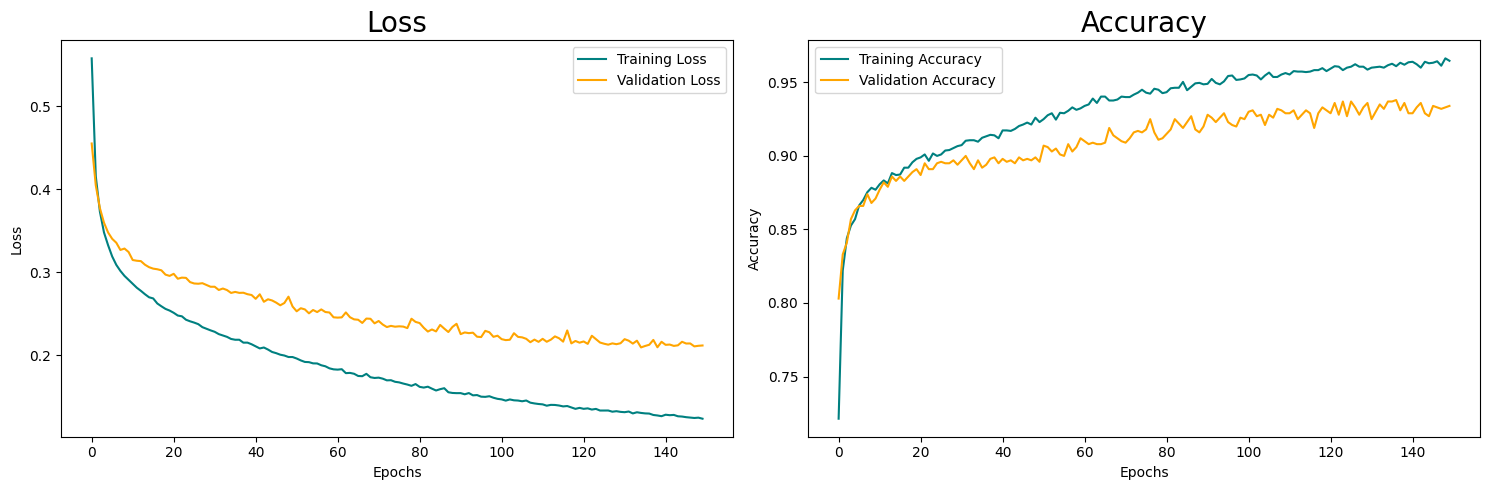

In [37]:
# Utilisation de la fonction pour afficher les graphiques
plot_loss_accuracy(results)

In [38]:
# Affiche la valeur minimale de la perte (loss) sur les données de validation
print("Minimum de la perte (loss) sur les données de validation : ", min(results.history['val_loss']))

# Affiche la valeur maximale de l'exactitude (accuracy) sur les données de validation
print("Maximum de l'exactitude (accuracy) sur les données de validation : ", max(results.history['val_accuracy']))

# Évalue le modèle de réseau de neurones sur les données de test et affiche la perte et l'exactitude
value_loss, value_accuracy = nn_model.evaluate(X_test, labels_encoded_test)
print("Perte (Loss) :", value_loss)
print("Exactitude (Accuracy) :", value_accuracy)

Minimum de la perte (loss) sur les données de validation :  0.20947322249412537
Maximum de l'exactitude (accuracy) sur les données de validation :  0.9380000233650208
32/32 [==============================] - 0s 745us/step - loss: 0.2118 - accuracy: 0.9340
Perte (Loss) : 0.21180999279022217
Exactitude (Accuracy) : 0.9340000152587891


In [39]:
# load the best model:
best_ann_model = tf.keras.models.load_model('/Users/surelmanda/Downloads/AirGUARD/Apple_Quality_ANN_Prediction/best_model/')

#
value_loss, value_accuracy = best_ann_model.evaluate(X_test,labels_encoded_test)

print("Perte (Loss) :", value_loss)
print("Exactitude (Accuracy) :", value_accuracy)

32/32 [==============================] - 0s 587us/step - loss: 0.2127 - accuracy: 0.9380
Perte (Loss) : 0.21266236901283264
Exactitude (Accuracy) : 0.9380000233650208


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

def evaluate_model(nn_model, X_test, labels_encoded_test, label_encoder):
    # Prédictions sur les données de test
    y_predicted = np.argmax(nn_model.predict(X_test), axis=-1)

    # Décodage des labels prédits et vrais labels
    y_pred = decode_labels(label_encoder, y_predicted)
    y_true = decode_labels(label_encoder, labels_encoded_test)

    # Rapport de classification
    print("Rapport de classification :\n", classification_report(y_true, y_pred))

    # Calcul du score F1_macro
    F1_macro = f1_score(y_true, y_pred, average='macro')
    print(f"Score F1_macro (comportement du modèle avec de nouvelles données) : {F1_macro}")

    # Matrice de confusion
    cf_matrix = confusion_matrix(y_true, y_pred)
    categories = np.unique(y_true)  # Nombre de classes uniques dans les vrais labels
    group_names = ['Vrai Négatif', 'Faux Positif', 'Faux Négatif', 'Vrai Positif']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(len(categories), len(categories))

    # Affichage de la matrice de confusion avec seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.xlabel("Valeurs prédites")
    plt.ylabel("Valeurs réelles")
    plt.title("Matrice de Confusion")
    plt.show()


32/32 [==============================] - 0s 533us/step
Rapport de classification :
               precision    recall  f1-score   support

         bad       0.93      0.95      0.94       499
        good       0.95      0.92      0.94       501

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000

Score F1_macro (comportement du modèle avec de nouvelles données) : 0.9379910707141828


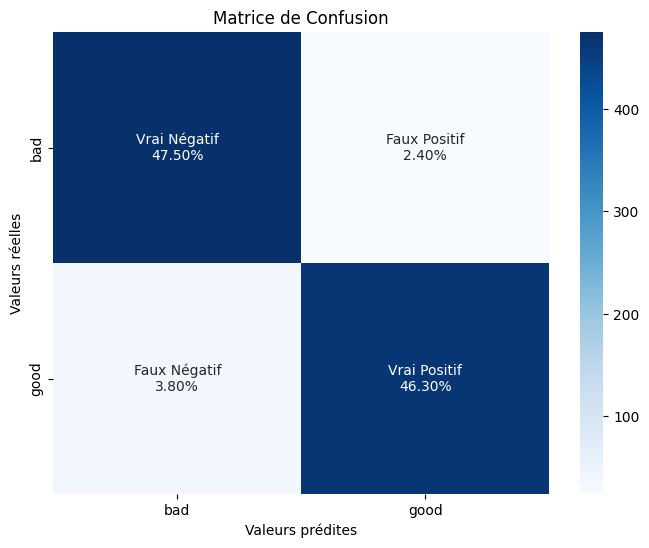

In [41]:
evaluate_model(best_ann_model, X_test, labels_encoded_test, label_encoder)

## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Construire un modèle de Machine Learning pour notre problème de classification. </div>

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

# for model evaluation
import time
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import ShuffleSplit,cross_val_score,train_test_split
from sklearn.model_selection import StratifiedKFold,StratifiedShuffleSplit, KFold ,RepeatedKFold, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# sklearn Algoritm of Machine Learning algorithms
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

<div class="content-section">
    <div class="header2">1.1 | K-Nearest Neighbour (KNN)</div>
    <div class="explain-box knn-box">
        <blockquote>
            <mark><b>The k-nearest neighbors (KNN)</b></mark> est un algorithme de classification de données <b>qui estime la probabilité qu'un point de données devienne membre d'un groupe ou d'un autre</b> en fonction du groupe auquel appartiennent les points de données les plus proches. L'algorithme des k plus proches voisins est un type d'algorithme d'apprentissage supervisé utilisé <b>pour résoudre des problèmes de classification et de régression</b>.<br><br>
            Il est appelé un <b>algorithme d'apprentissage paresseux ou apprenant paresseux</b> car il ne réalise aucun apprentissage lors de la fourniture des données d'entraînement. Au lieu de cela, il stocke simplement les données pendant la période d'entraînement et ne réalise aucun calcul. Il ne construit pas de modèle tant qu'une requête n'est pas effectuée sur l'ensemble de données. Cela rend le KNN idéal pour l'exploration de données.<br><br>
        </blockquote>
    </div>
    <div class="images">
        <img src="https://1.bp.blogspot.com/-D6REhf2XBwQ/XZcWn0cwSEI/AAAAAAAAAvs/LUCN8jxvzcMjkkDK4FAXSuR7MBDW8SBJgCLcBGAsYHQ/s1600/KNN_final_a1mrv9.jpg" alt="KNN" width="35%">
        <!-- Ajoutez ici une description ou une légende pour l'image -->
        <i>🖼 KNN by Kita Informatika</i>
    </div>
</div>

<div class="content-section">
    <div class="header2">1.2 | Logistic Regression</div>
    <div class="explain-box logistic-box">
        <blockquote>
            <mark><b>Logistic regression</b></mark> est une méthode statistique utilisée pour construire des modèles d'apprentissage automatique où <b>la variable dépendante est dichotomique : c'est-à-dire binaire</b>. La régression logistique est utilisée pour décrire les données et <b>la relation entre une variable dépendante et une ou plusieurs variables indépendantes</b>. Les variables indépendantes peuvent être nominales, ordinales ou de type intervalle.<br><br>
            Le nom "régression logistique" est dérivé du concept de la fonction logistique qu'elle utilise. <b>La fonction logistique est également connue sous le nom de fonction sigmoïde</b>. La valeur de cette fonction logistique se situe entre zéro et un.<br><br>
        </blockquote>
    </div>
    <div class="images">
        <img src="https://www.simplilearn.com/ice9/free_resources_article_thumb/years-2.JPG" alt="Logistic Regression" width="40%">
        <!-- Ajoutez ici une description ou une légende pour l'image -->
        <i>🖼 Logistic Function by Simplilearn</i>
    </div>
</div>


##### Fonction Baseline Model Building 

In [97]:
import time
def initialize_multi_label_classifiers():
    """
    Initializes a list of classifiers for multi-label classification.

    Returns:
    Dictionary of initialized classifiers with model names as keys.
    """
    classifiers = {
        "Extra Trees": ExtraTreesClassifier(n_jobs=-1),
        "Random Forest": RandomForestClassifier(n_jobs=-1),
        "K-Nearest Neighbors": KNeighborsClassifier(),
        "Logistic Regression": LogisticRegression(),
        "Linear SVC": LinearSVC(),
        "Ridge Classifier": RidgeClassifier(),
        "SVC": SVC(kernel='linear'),
        "XGBoost":XGBClassifier(),
        "Decision Tree": DecisionTreeClassifier(),
        #"CatBoost": CatBoostClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        #"LGBM": LGBMClassifier()
    }
    return classifiers

def Train_and_Evaluate_models(model, X_train, y_train, X_test, y_test):
    print(f"Entraînement du modèle avec {type(model).__name__}")

    start_time = time.time()  # Temps de début de l'entraînement time.time()

    # Entraînement du modèle
    model.fit(X_train, y_train)

    end_time = time.time()  # Temps de fin de l'entraînement
    training_time = end_time - start_time  # Temps écoulé pour l'entraînement

    print(f"Temps d'entraînement : {training_time:.2f} secondes")

    # Prédiction des valeurs pour le jeu de données de test
    y_pred = model.predict(X_test)

    # Calcul des différentes métriques
    accuracy = accuracy_score(y_test, y_pred)
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    # Création du dictionnaire contenant les différentes métriques
    #name_model = type(model).__name__
    metrics_dict = {'Accuracy': accuracy,'F1_macro': f1_macro,'training_time':training_time}

    return metrics_dict

In [92]:
def visualize_metric_results(df_results, metric):
    # Sort DataFrame by the specified metric
    sorted_df = df_results.sort_values(by=metric, ascending=False)

    # Use a color palette from plotly express for different models
    colors = px.colors.qualitative.Plotly[:len(sorted_df)]

    # Create the plot
    fig = px.bar(sorted_df, x=sorted_df.index, y=metric, color=sorted_df.index, color_discrete_sequence=colors)

    # Update layout
    fig.update_layout(
        title=f'Results for {metric}',
        xaxis_title='Model',
        yaxis_title=metric
    )

    # Show the plot
    fig.show()


from sklearn.preprocessing import LabelEncoder

def encoder_labels(y_train, y_test):
    """
    Encodage des labels à l'aide de LabelEncoder.

    Args:
    - y_train : Series, tableau des labels de l'ensemble d'entraînement.
    - y_test : Series, tableau des labels de l'ensemble de test.

    Returns:
    - y_train_encoded : NumPy array, labels encodés de l'ensemble d'entraînement.
    - y_test_encoded : NumPy array, labels encodés de l'ensemble de test.
    - label_encoder : LabelEncoder, objet LabelEncoder entraîné sur les données d'entraînement.
    """
    label_encoder = LabelEncoder()
    y_train_encoded = label_encoder.fit_transform(y_train)
    y_test_encoded = label_encoder.transform(y_test)
    
    return y_train_encoded, y_test_encoded, label_encoder

def decoder_labels(y_encoded, label_encoder):
    """
    Décodage des labels à l'aide d'un LabelEncoder.

    Args:
    - y_encoded : NumPy array, labels encodés à décoder.
    - label_encoder : LabelEncoder, objet LabelEncoder entraîné.

    Returns:
    - y_decoded : NumPy array, labels décodés.
    """
    y_decoded = label_encoder.inverse_transform(y_encoded)
    
    return y_decoded



## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Accuracy of Classifiers base models for Data  (X_train, y_train) </div>

In [93]:
# Encodage des labels et récupération de l'objet LabelEncoder
y_train_encoded, y_test_encoded, label_encoder = encoder_labels(y_train, y_test)

# Affichage des résultats
print("Labels encodés de l'ensemble d'entraînement :", y_train_encoded)
print("Labels encodés de l'ensemble de test :", y_test_encoded[:10])


# Décodage des labels de l'ensemble de test
#y_test_decoded = decoder_labels(y_test_encoded, label_encoder)
#print("Labels décodés de l'ensemble de test :", y_test_decoded)

Labels encodés de l'ensemble d'entraînement : [1 1 0 ... 1 0 0]
Labels encodés de l'ensemble de test : [1 1 1 0 0 1 1 0 0 1]


In [98]:
# Initialisation des classificateurs
classifiers = initialize_multi_label_classifiers()

# Initialisation du dictionnaire pour stocker les résultats
results = {}

# Boucle sur les classificateurs
for name_model, model in classifiers.items():
    # Affichage du nom du modèle
    print("--------------------------------------------------------------------")
    print("Train model:", name_model)

    # Évaluation du modèle et stockage du résultat dans le dictionnaire
    #results[name_model]  = Train_and_Evaluate_models(model, X_train, y_train, X_test, y_test)
    results[name_model]  = Train_and_Evaluate_models(model, X_train, y_train_encoded, X_test, y_test_encoded) 
    print("\n")


--------------------------------------------------------------------
Train model: Extra Trees
Entraînement du modèle avec ExtraTreesClassifier
Temps d'entraînement : 0.17 secondes


--------------------------------------------------------------------
Train model: Random Forest
Entraînement du modèle avec RandomForestClassifier


Temps d'entraînement : 0.18 secondes


--------------------------------------------------------------------
Train model: K-Nearest Neighbors
Entraînement du modèle avec KNeighborsClassifier
Temps d'entraînement : 0.01 secondes


--------------------------------------------------------------------
Train model: Logistic Regression
Entraînement du modèle avec LogisticRegression
Temps d'entraînement : 0.07 secondes


--------------------------------------------------------------------
Train model: Linear SVC
Entraînement du modèle avec LinearSVC
Temps d'entraînement : 0.19 secondes


--------------------------------------------------------------------
Train model: Ridge Classifier
Entraînement du modèle avec RidgeClassifier
Temps d'entraînement : 0.02 secondes


--------------------------------------------------------------------
Train model: SVC
Entraînement du modèle avec SVC
Temps d'entraînement : 0.33 secondes


--------------------------------------------------------------------
Train

In [100]:
# Transformer le dictionnaire en DataFrame
df_results = pd.DataFrame(results).T  # .T pour transposer les lignes et colonnes

# Afficher le DataFrame
display(df_results)

# Test de la fonction avec 'Accuracy'
visualize_metric_results(df_results, 'Accuracy')

,Accuracy,F1_macro,training_time
Extra Trees,0.879,0.878994,0.174639
Random Forest,0.863,0.862989,0.183028
K-Nearest Neighbors,0.889,0.888991,0.006815
Logistic Regression,0.747,0.746757,0.070840
Linear SVC,0.748,0.747773,0.190842
Ridge Classifier,0.751,0.750818,0.020496
SVC,0.749,0.748843,0.327375
XGBoost,0.886,0.885989,0.205425
Decision Tree,0.820,0.819999,0.049472
Gradient Boosting,0.853,0.853000,0.982354


## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Accuracy of K-Nearest Neighbors for Unscaled Data & Scaled Data </div>

In [101]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
def train_and_evaluate_with_scaling(X_train, X_test, y_train, y_test, classifier, scaler_names):
    # Initialisation des résultats
    results = {}
    
    # Entraînement du modèle sans mise à l'échelle
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results['Without Scaling'] = accuracy
    
    # Entraînement du modèle avec chaque scaler
    for scaler_name in scaler_names:
        scaler = None
        if scaler_name == 'StandardScaler':
            scaler = StandardScaler()
        elif scaler_name == 'MinMaxScaler':
            scaler = MinMaxScaler()
        elif scaler_name == 'RobustScaler':
            scaler = RobustScaler()
        else:
            raise ValueError(f"Scaler '{scaler_name}' not supported.")
        
        # Mise à l'échelle des données
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Entraînement du modèle avec les données mises à l'échelle
        classifier.fit(X_train_scaled, y_train)
        y_pred_scaled = classifier.predict(X_test_scaled)
        accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
        results[scaler_name] = accuracy_scaled
    
    # Visualisation des résultats
    plt.figure(figsize=(15, 8))
    plt.bar(results.keys(), results.values(), color='skyblue')
    plt.xlabel('Scaler')
    plt.ylabel('Accuracy')
    plt.title('\n\nAccuracy of Different Scalers')
    for i, value in enumerate(results.values()):
        plt.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=10)  # Ajustement de la position verticale du texte
    plt.ylim(0, 1)
    plt.tight_layout()  # Ajustement de l'espacement entre les barres et les bords du graphique
    plt.show()

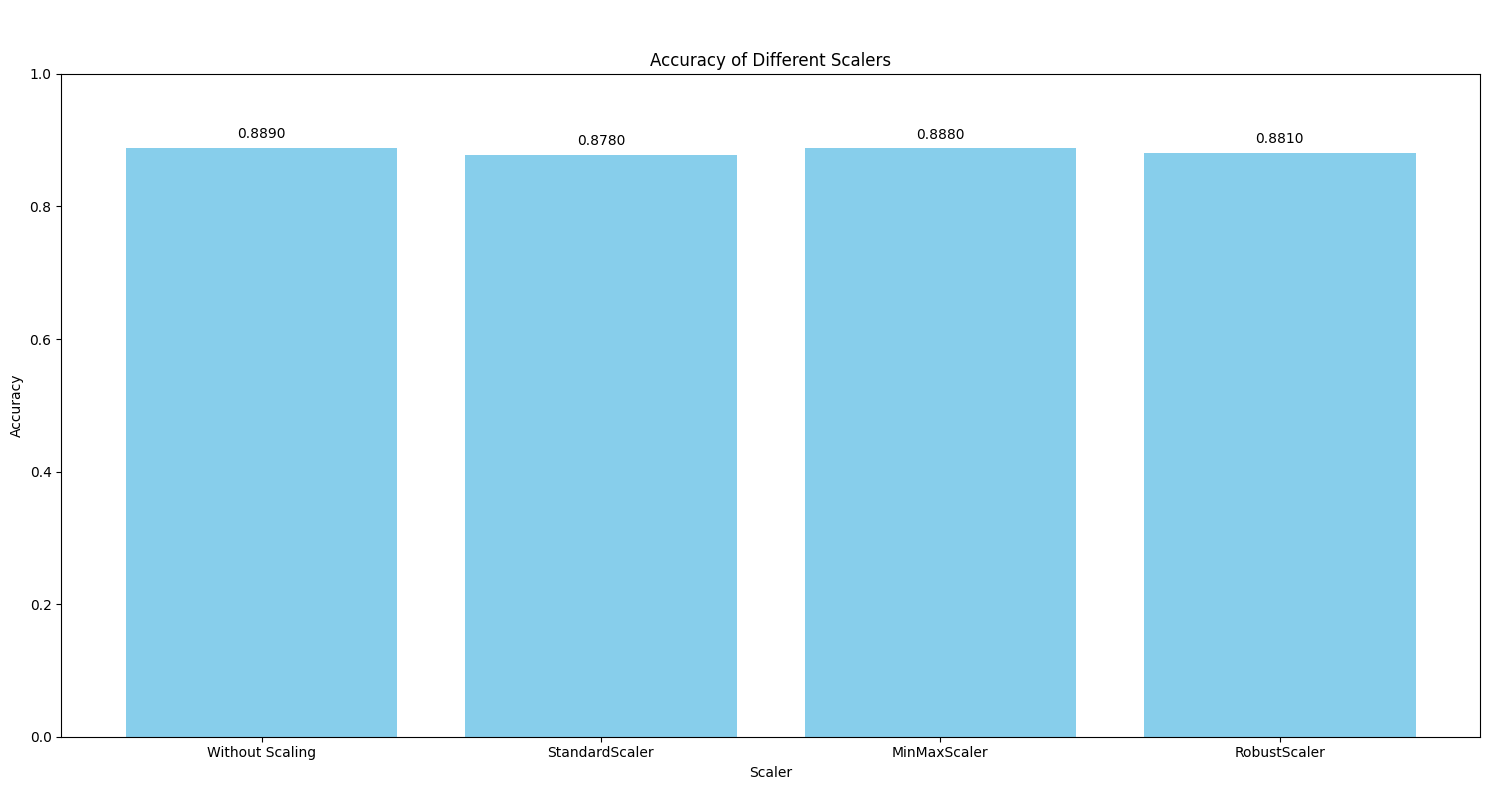

In [48]:
model = KNeighborsClassifier()
scalers = ['StandardScaler', 'MinMaxScaler', 'RobustScaler']
train_and_evaluate_with_scaling(X_train, X_test, y_train, y_test, model, scalers)

<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">
<h3 align="left"><font color=brown> 🔍 Conclusion :</font></h3>
    <p>
        L'analyse de l'accuracy en fonction des différents modèles de scaling nous montre que :
        <ul>
            <li>L'accuracy des données non mises à l'échelle est nettement meilleure que les trois méthodes de scaling. Cependant, cette différence, bien que visible, reste toutefois très légère.</li>
        </ul>
    </p>
</div>


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">Graphiques de Variance Expliquée par l'Analyse en Composantes Principales </div> 

### 1.1 - Comment choisir la meilleur valeur de du nombre de componenet pour le pca ?

In [49]:
def plot_pca_explained_variance(data, numerical_columns):
    # Extract numerical features and target variable
    X_data = data[numerical_columns].copy()

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_data)

    # Perform PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Calculate the explained variance
    explained_variance = pca.explained_variance_

    # Create a 2x1 grid of subplots
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

    # Plot the explained variance in the first subplot
    bars = ax1.bar(range(1, len(explained_variance) + 1), explained_variance)
    ax1.set_xlabel("Principal Component")
    ax1.set_ylabel("Explained Variance")
    ax1.set_title("Explained Variance by Principal Component")

    # Adding labels with values on the bars
    for bar, value in zip(bars, explained_variance):
        height = bar.get_height()
        ax1.annotate(f'{value:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3), textcoords='offset points',
                     ha='center', va='bottom')

    # Calculate the cumulative explained variance
    cumulative_explained_variance = np.cumsum(explained_variance)

    # Plot the cumulative explained variance in the second subplot
    ax2.plot(
        range(1, len(cumulative_explained_variance) + 1),
        cumulative_explained_variance,
        marker="o",
    )
    ax2.set_xlabel("Number of Principal Components")
    ax2.set_ylabel("Cumulative Explained Variance")
    ax2.set_title("Cumulative Explained Variance by Principal Components")

    # Display the figure
    plt.tight_layout()
    plt.show()


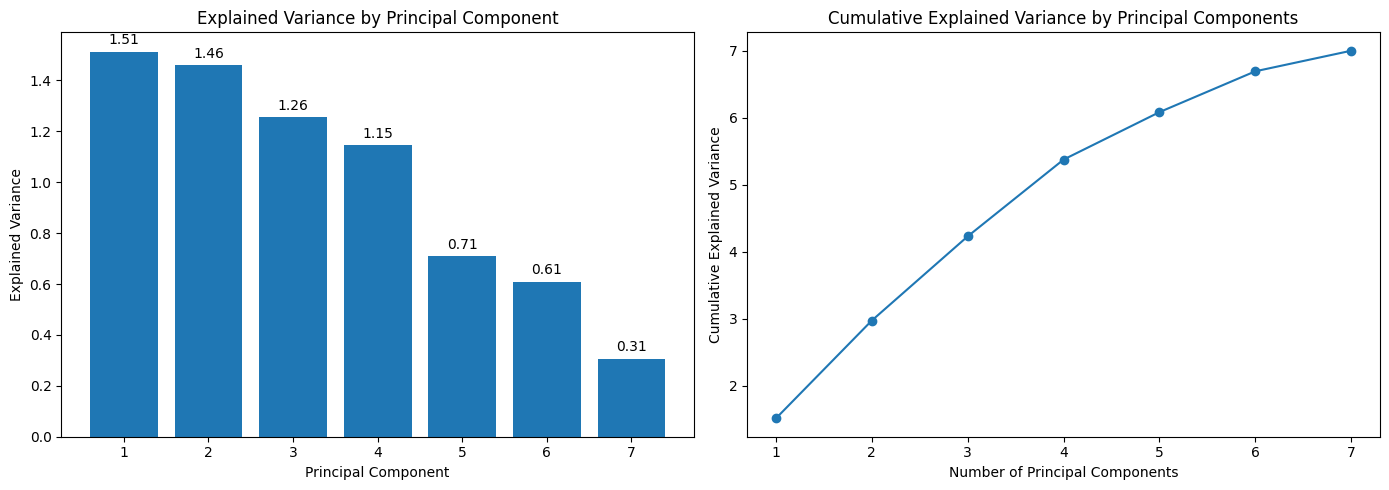

In [50]:
plot_pca_explained_variance(data_clean, numerical_features)

<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">
<h3 align="left"><font color=brown> 🔍 Conclusion :</font></h3>
    <p>
        L'analyse de graphiques de Variance Expliquée par l'Analyse en Composantes Principales PCA nous montre que :
        <ul>
            <li> On peut voir que la variance expliquée par les premier et deuxième composants principaux est d'environ 15% et 14% respectivement. Nous pouvons maintenant calculer la variance cumulative expliquée par ceux-ci. Pour plus de facilité d'observation, nous convertissons les chiffres en pourcentages ici.</li>
            <li>  Le graphique indique que le seuil de 70% est franchi au PC = 4. Idéalement, nous pouvons garder 4 (ou au maximum 5) composants ici. Avant PC = 5, le graphique suit une tendance à la hausse. Après avoir franchi 5, il est presque stable. Cependant, nous avons conservé ici les 9 CP pour obtenir toutes les données dans les résultats. Et à des fins de visualisation dans la figure en 2D, nous avons tracé uniquement PC1 vs PC2.</li>
        </ul>
    </p>
</div>

### 1.2 - Comment varie l'accuracy score en fonction en n_components composantes principales (PCA)

In [51]:
def apply_pca(X, new_dimension=2):
    """
    Applique l'analyse en composantes principales (PCA) à un ensemble de données.

    :param X: DataFrame, l'ensemble de données
    :param new_dimension: int, la nouvelle dimension souhaitée après PCA
    :return: DataFrame, le DataFrame transformé par PCA
    """
    # Étape 1: Standardisation des données
    std = StandardScaler()
    transformed = std.fit_transform(X)

    # Étape 2: Appliquer l'analyse en composantes principales (PCA)
    pca = PCA(n_components=new_dimension)
    X_pca = pca.fit_transform(transformed)

    # Étape 3: Créer un DataFrame avec les composantes principales
    df_pca = pd.DataFrame(data=X_pca, columns=["X_%s" % x for x in range(new_dimension)])

    # Informations d'impression
    # print("Forme originale:   ", X.shape)
    # print("Forme transformée:", df_pca.shape)

    return df_pca

def evaluate_accuracy_vs_dimensions(X, y, threshold, max_new_dimension, model):
    """
    Évalue comment l'accuracy varie en fonction de la dimension après PCA.

    :param X: DataFrame, les caractéristiques des données
    :param y: Series, la variable cible
    :param threshold: float, la taille de l'ensemble de test (proportion)
    :param max_new_dimension: int, la dimension maximale à explorer après PCA
    :param model: modèle de classification utilisé pour évaluer l'accuracy
    """
    accuracy_scores = []
    dimensions = list(range(1, max_new_dimension + 1, 1))

    for dim in dimensions:
        X_dim = apply_pca(X, dim)  # Utilisation de la fonction apply_pca
        X_train, X_test, y_train, y_test = train_test_split(X_dim, y, test_size=threshold, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

    # Tracer le graphique des accuracies
    plt.figure(figsize=(11, 5))
    plt.plot(dimensions, accuracy_scores, marker='o', linestyle='-')
    plt.title("Variation de l'accuracy en fonction de la dimension après PCA")
    plt.xlabel('Dimension après PCA')
    plt.ylabel('Accuracy')
    plt.xticks(np.arange(1, max_new_dimension + 1))
    plt.grid(True)
    # Ajouter les valeurs de x et y à chaque point
    for i, (x, y) in enumerate(zip(dimensions, accuracy_scores)):
        plt.text(x, y, f'({x}, {y:.2f})', ha='left', va='bottom')

    plt.show()


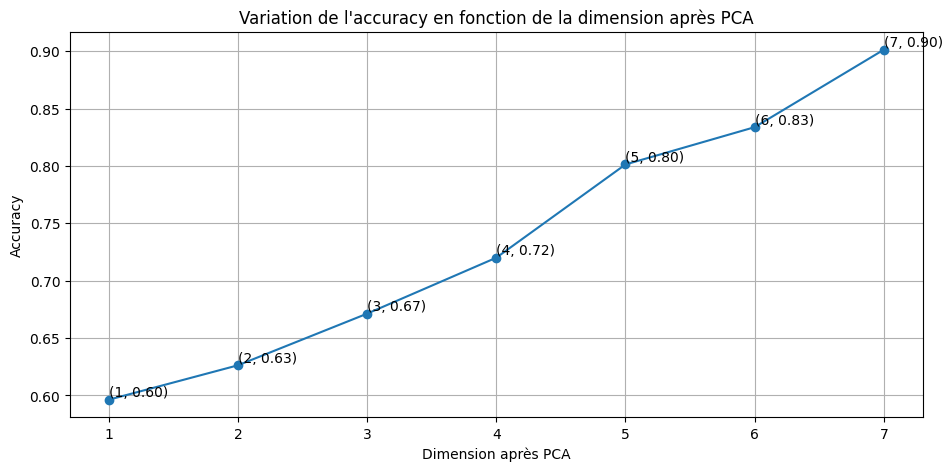

In [52]:
# Initialisation du modèle de classification KNeighborsClassifier
Classifier_model = KNeighborsClassifier()
evaluate_accuracy_vs_dimensions(X, y ,0.20,X.shape[1], Classifier_model)

<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">
<h3 align="left"><font color=brown> 🔍 Conclusion :</font></h3>
    <p>
        L'analyse de la Variation du score accuracy en fonction de la dimension après PCA nous montre que :
        <ul>
            <li> L'accuracy augmente à mesure que le nombre de composantes PCA utilisées augmente, atteignant sa valeur maximale lorsque le nombre de composantes est égal à 7.</li>
        </ul>
    </p>
</div>




## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;">  Data Modeling - K means clustering </div>

In [74]:
from sklearn.metrics import classification_report, accuracy_score, davies_bouldin_score, silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.contrib.wrapper import wrap
from yellowbrick.style import set_palette
from pywaffle import Waffle
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [75]:
def apply_kmeans(X_kmeans, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_kmeans)
    X_kmeans['cluster'] = clusters
    return X_kmeans

def visualize_cluster(column1, column2, target, data, cluster_values):
    plt.figure(figsize=(15, 6))

    # Visualisation du dataset avant l'application de K-means
    plt.subplot(1, len(cluster_values) + 1, 1)
    sns.scatterplot(x=column1, y=column2, hue=target, data=data, palette='Set1')
    plt.title('Dataset avant K-means')
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.legend(title=target)
    plt.grid(True)

    for i, n_clusters in enumerate(cluster_values):
        # Application de K-means
        X_kmeans = data[[column1, column2]].copy()
        X_kmeans_result = apply_kmeans(X_kmeans, n_clusters)

        # Visualisation du dataset après K-means
        plt.subplot(1, len(cluster_values) + 1, i + 2)
        sns.scatterplot(x=column1, y=column2, hue='cluster', data=X_kmeans_result, palette='Set1')
        plt.title(f'Dataset après K-means avec {n_clusters} clusters')
        plt.xlabel(column1)
        plt.ylabel(column2)
        plt.legend(title='Cluster')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

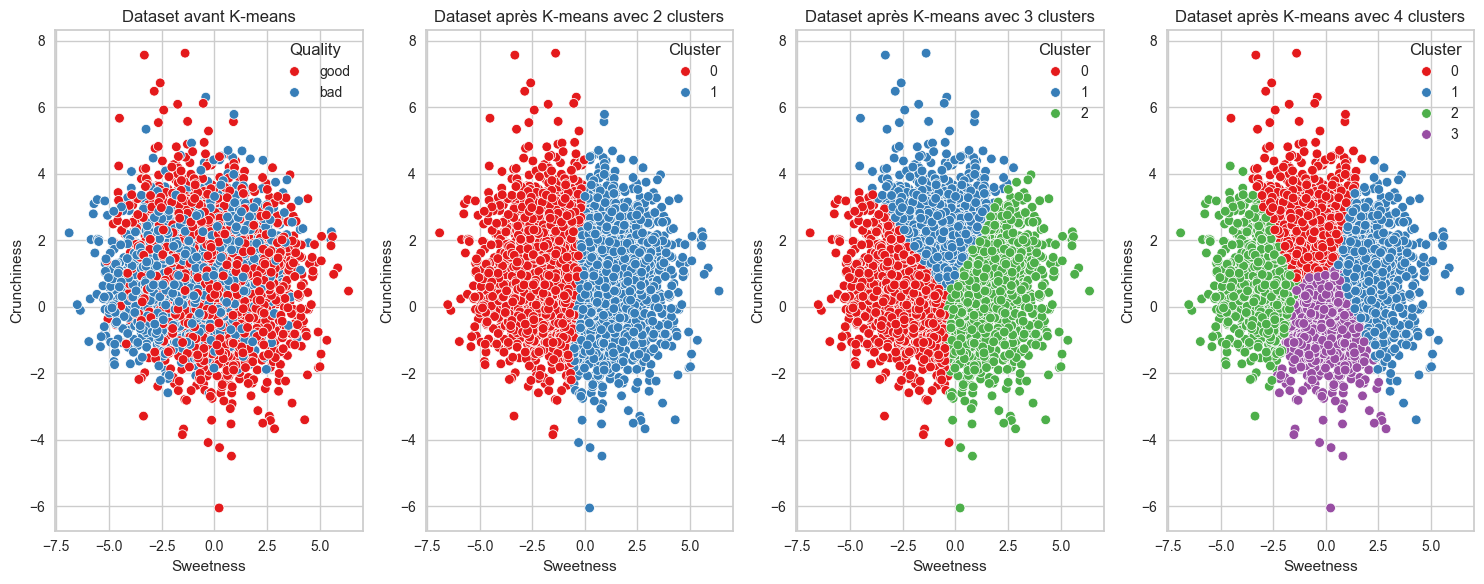

In [76]:
cluster_values = [2, 3, 4]
visualize_cluster('Sweetness', 'Crunchiness', 'Quality', data_clean.copy(), cluster_values)


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown> 🔍 Conclusion:</font></h3>
    
* Avant l'application de l'algorithme K-Means, les données des classes "good" et "bad" étaient largement dispersées dans le plan, ce qui rendait toute distinction claire entre les deux groupes pratiquement impossible. Cependant, une fois l'algorithme appliqué avec un nombre de clusters n=2, une séparation nette et sans ambiguïté entre ces deux classes émerge. En augmentant le nombre de clusters à n=3 ou 4, cette séparation se renforce davantage, révélant ainsi une organisation distincte des données en groupes discernables.


In [77]:
# --- Define K-Means Functions ---
def kmeans(X):
    
    # --- Figures Settings ---
    set_palette('accent')  # Remplacer 'tab10' par le nom de la palette de couleurs souhaitée
    title = dict(fontsize=14, fontweight="bold", fontname='Arial')  # Remplacer 'Arial' par le nom de votre police
    text_style=dict(fontweight="bold", fontname='Arial')  # Remplacer 'Arial' par le nom de votre police
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # --- K-Means ---
    model = KMeans(random_state=4)
    
    # --- Elbow Score ---
    elbow_score = KElbowVisualizer(model, k=(1, 11), ax=ax1)
    elbow_score.fit(X)
    elbow_score.finalize()
    elbow_score.ax.set_title('Distortion Score Elbow\n', **title)
    elbow_score.ax.tick_params(labelsize=7)
    for text in elbow_score.ax.legend_.texts: text.set_fontsize(9)
    for spine in elbow_score.ax.spines.values(): spine.set_color('None')
    elbow_score.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
    elbow_score.ax.grid(axis='y', alpha=0.5, color='lightgrey', linestyle='dotted')  # Remplacer 'lightgrey' par votre couleur de grille
    elbow_score.ax.grid(axis='x', alpha=0)
    elbow_score.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score.ax.set_ylabel('Distortion Scores\n', fontsize=9, **text_style)
   
    # --- Elbow Score (Calinski-Harabasz Index) ---
    elbow_score_ch = KElbowVisualizer(model, k=(2, 8), metric='calinski_harabasz', timings=False, ax=ax2)
    elbow_score_ch.fit(X)
    elbow_score_ch.finalize()
    elbow_score_ch.ax.set_title('Calinski-Harabasz Score Elbow\n', **title)
    elbow_score_ch.ax.tick_params(labelsize=7)
    for text in elbow_score_ch.ax.legend_.texts: text.set_fontsize(9)
    for spine in elbow_score_ch.ax.spines.values(): spine.set_color('None')
    elbow_score_ch.ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), borderpad=2, frameon=False, fontsize=8)
    elbow_score_ch.ax.grid(axis='y', alpha=0.5, color='lightgrey', linestyle='dotted')  # Remplacer 'lightgrey' par votre couleur de grille
    elbow_score_ch.ax.grid(axis='x', alpha=0)
    elbow_score_ch.ax.set_xlabel('\nK Values', fontsize=9, **text_style)
    elbow_score_ch.ax.set_ylabel('Calinski-Harabasz Score\n', fontsize=9, **text_style)
    
    plt.suptitle('Apple Quality Clustering using K-Means', fontsize=16, **text_style)
    plt.gcf().text(0.9, 0.05, 'kaggle.com/caesarmario', style='italic', fontsize=7, fontname='Arial')  # Remplacer 'Arial' par le nom de votre police
    plt.tight_layout()
    plt.show()


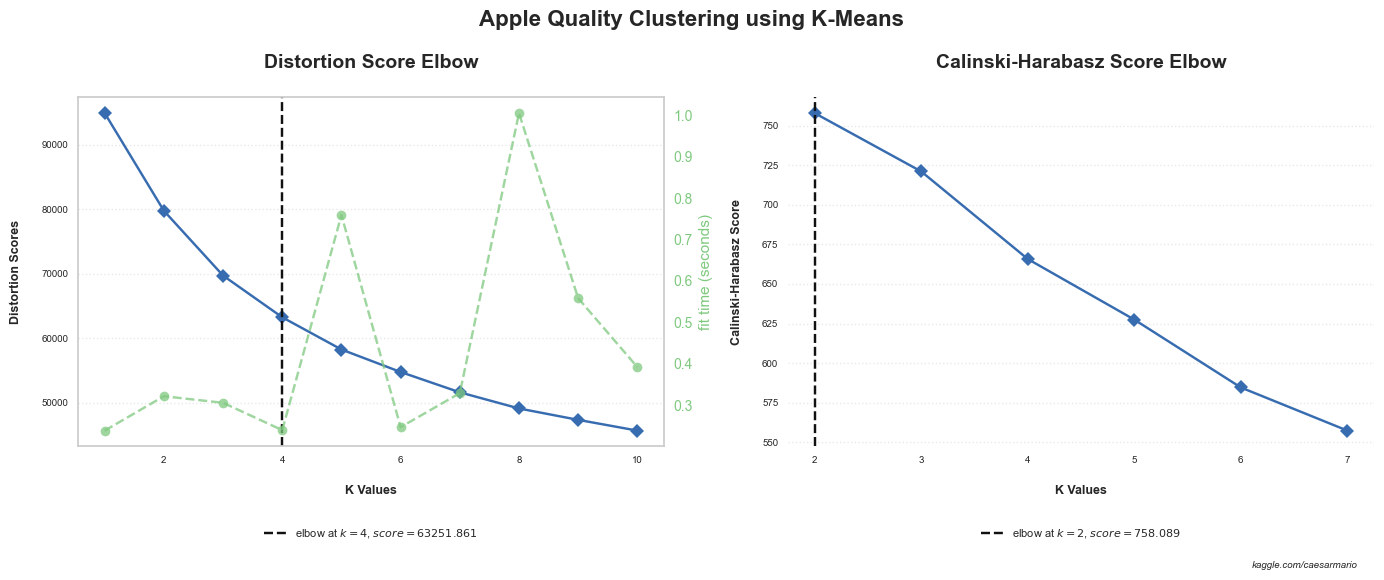

In [78]:
# --- Calling K-Means Functions ---
kmeans(X.copy());

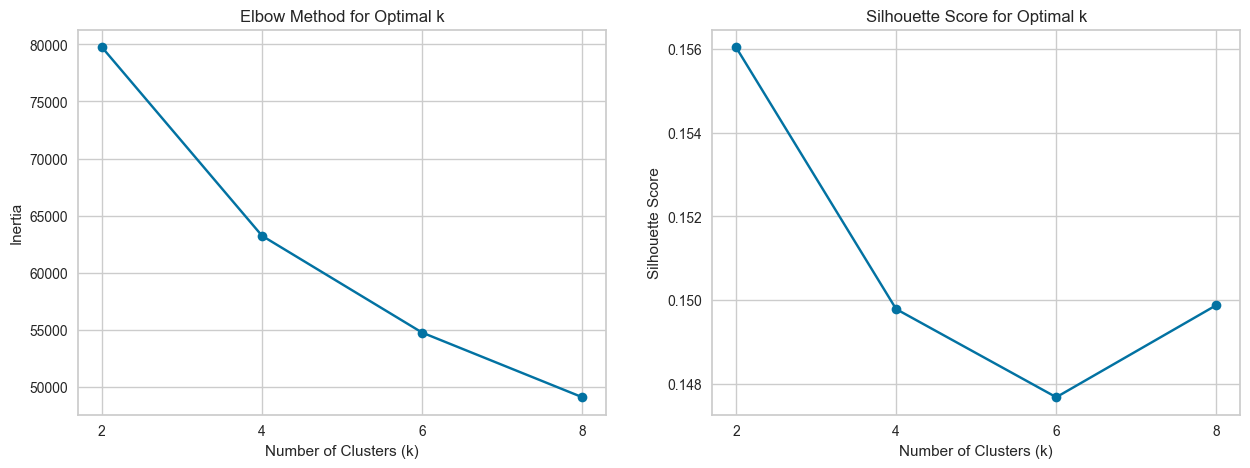

In [158]:
def evaluate_kmeans(X, k_range):
    inertias = []
    silhouette_scores = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)
        if k > 1:  # Silhouette score is undefined for k=1
            silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    
    # Plotting both curves in the same figure
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    # Elbow curve on the left
    axs[0].plot(k_range, inertias, marker='o')
    axs[0].set_title('Elbow Method for Optimal k')
    axs[0].set_xlabel('Number of Clusters (k)')
    axs[0].set_ylabel('Inertia')
    axs[0].set_xticks(k_range)
    axs[0].grid(True)
    
    # Silhouette score curve on the right
    if silhouette_scores:
        axs[1].plot(k_range[:len(silhouette_scores)], silhouette_scores, marker='o')
        axs[1].set_title('Silhouette Score for Optimal k')
        axs[1].set_xlabel('Number of Clusters (k)')
        axs[1].set_ylabel('Silhouette Score')
        axs[1].set_xticks(k_range)
        axs[1].grid(True)
    
    plt.show()
        
# Exemple d'utilisation avec deux colonnes spécifiées et une plage de valeurs de k
X_kmeans = X.copy()  # Remplacez 'data' par le nom de votre DataFrame
k_range = range(2, 10, 2)  # Plage de valeurs de k à évaluer
evaluate_kmeans(X_kmeans, k_range)


<div style="border-radius:10px; border:#808080 dashed; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">
<h3 align="left"><font color=brown> 🔍 Conclusion :</font></h3>
    <ul>
        <li> Après avoir examiné les résultats de la méthode du coude (elbow) qui indique une valeur optimale de <mark><b>4 clusters</b></mark>, nous constatons cependant qu'un score de silhouette donne une valeur de <mark><b>2 clusters</b></mark>. Cela correspond parfaitement aux deux classes présentes dans notre jeu de données initial. En conclusion, le score de silhouette apparaît comme la métrique la plus appropriée dans ce cas, nous guidant ainsi vers un choix de <mark><b>k plus réaliste pour notre ensemble de données</b></mark>.</li>
        <ul>
        </ul>
    </ul>
</div>


In [1]:
# Understanding the Bias-Variance Tradeoff
# In order to understand why max_depth of five was the “Best Model” for our data, take a look at the graph below, 
# which shows the model performance when tested on the training and test set.
# https://builtin.com/data-science/train-test-split

## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Optimising The K-Nearest Neighbors model </div>

### 1.1 - Plot the accuracy of K-Nearest Neighbors for different values of k

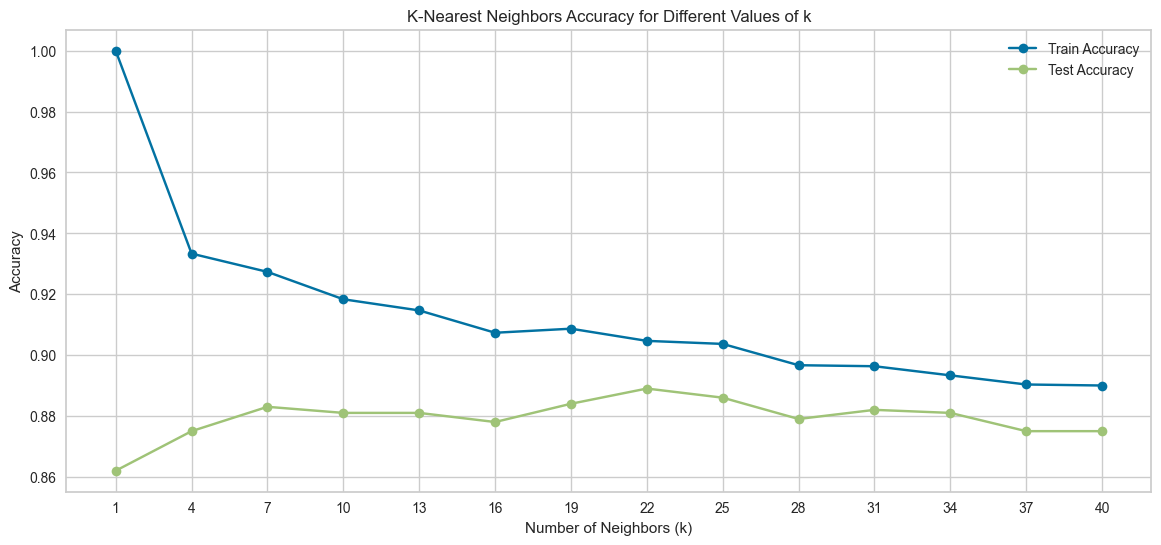

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def plot_knn_accuracy(X_train, y_train, X_test, y_test, max_k=10):
    """
    Plot the accuracy of K-Nearest Neighbors for different values of k.

    Parameters:
    - X_train: Features for training.
    - y_train: Target variable for training.
    - X_test: Features for testing.
    - y_test: Target variable for testing.
    - max_k: Maximum value of k to plot (default is 10).

    Returns:
    - None (displays a plot).
    """

    k_values = range(1, max_k+1, 3)
    train_accuracies = []
    test_accuracies = []

    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)

        train_pred = knn.predict(X_train)
        train_accuracy = accuracy_score(y_train, train_pred)
        train_accuracies.append(train_accuracy)

        test_pred = knn.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_pred)
        test_accuracies.append(test_accuracy)

    plt.figure(figsize=(14, 6))
    plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
    plt.plot(k_values, test_accuracies, label='Test Accuracy', marker='o')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Accuracy')
    plt.title('K-Nearest Neighbors Accuracy for Different Values of k')
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()

# Utilisation de la fonction avec vos données X_train et X_test
# Supposons que vous ayez déjà défini X_train, y_train, X_test, y_test

plot_knn_accuracy(X_train, y_train, X_test, y_test, max_k=40)


### 1.2 - Optimize the K-Nearest Neighbors algorithm using GridSearchCV and cross-validation.

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

def optimize_knn(X_train, y_train, K_folders = 5, cv_strategy='stratified'):
    """
    Optimize the K-Nearest Neighbors algorithm using GridSearchCV and cross-validation.

    Parameters:
    - X_train: Features for training.
    - y_train: Target variable for training.

    Returns:
    - best_knn: Optimized K-Nearest Neighbors model.
    """

    # Paramètres à tester
    param_grid = {
        'n_neighbors': [2, 5, 7, 10, 15],  # Nombre de voisins à tester
        'weights': ['uniform', 'distance'],  # Méthode de pondération des voisins
        'metric': ['euclidean', 'manhattan'],  # Mesure de distance
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
    }

    # Définition de la stratégie de validation croisée
    if cv_strategy == 'stratified':
        cross_val = StratifiedKFold(n_splits=K_folders, shuffle=True, random_state=42)
    elif cv_strategy == 'shuffle_split':
        cross_val = ShuffleSplit(n_splits=K_folders, test_size=0.10, random_state=42)
    else:
        raise ValueError("La stratégie de validation croisée doit être 'stratified' ou 'shuffle_split'.")

    # Initialiser le classifieur KNN
    knn = KNeighborsClassifier()

    # Initialiser GridSearchCV
    grid_search = GridSearchCV(knn, param_grid, cv=cross_val, scoring='accuracy')

    # Faire tourner GridSearchCV sur les données d'entraînement
    grid_search.fit(X_train, y_train)

    # Récupérer le meilleur modèle
    best_knn = grid_search.best_estimator_

    # Récupération des résultats
    results = grid_search.cv_results_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    # Affichage des résultats
    print("Résultats de la recherche sur la grille :")
    print("")

    print("Meilleurs paramètres pour K-Nearest Neighbors:", best_params)
    print("")

    print("Meilleure précision (accuracy) avec GridSearchCV: ", best_score)
    print("")

    # Retourner le meilleur modèle
    return best_knn


### 1.3 - Resultat après l'optimisation de KNeighborsClassifier.

Résultats de la recherche sur la grille :

Meilleurs paramètres pour K-Nearest Neighbors: {'algorithm': 'auto', 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}

Meilleure précision (accuracy) avec GridSearchCV:  0.8960000000000001

accuracy_score(comportement du modèle avec de nouvelles données) : 88.5000% de score de accuracy
Score F1_macro (comportement du modèle avec de nouvelles données) : 0.8849906842454239
              precision    recall  f1-score   support

         bad       0.88      0.90      0.89       499
        good       0.89      0.87      0.88       501

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.88      1000
weighted avg       0.89      0.89      0.88      1000



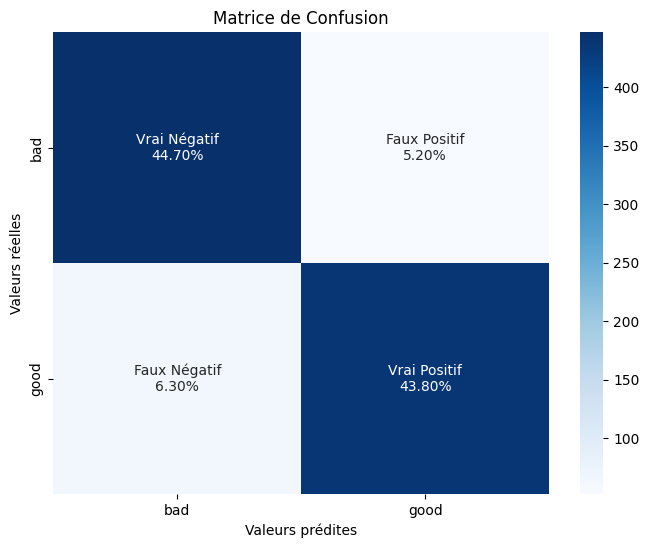

In [68]:
best_knn_model = optimize_knn(X_train, y_train, 5, 'stratified')
y_pred = best_knn_model.predict(X_test)
#accuracy = round(accuracy_score(y_test, y_pred),4)
#print("Accuracy du meilleur modèle KNN sur de nouvelle donnée:", accuracy)

# Calcul du score accuracy
accuracy = round(accuracy_score(y_test, y_pred), 4)
print(f"accuracy_score(comportement du modèle avec de nouvelles données) : {accuracy_score(y_test, y_pred) * 100:.4f}% de score de accuracy")

# Calcul du score F1_macro
F1_macro = f1_score(y_test, y_pred, average='macro')
print(f"Score F1_macro (comportement du modèle avec de nouvelles données) : {F1_macro}")

# Print classification report and accuracy for the test dataset
print(classification_report(y_test, y_pred))

# Matrice de confusion
cf_matrix = confusion_matrix(y_test, y_pred)
categories = np.unique(y_test)  # Nombre de classes uniques dans les vrais labels
group_names = ['Vrai Négatif', 'Faux Positif', 'Faux Négatif', 'Vrai Positif']
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
labels = np.asarray(labels).reshape(len(categories), len(categories))

# Affichage de la matrice de confusion avec seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.title("Matrice de Confusion")
plt.show()


## <div style="text-align: left; background-color:aliceblue ; font-family: Jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> Optimisation des hyperparamètres pour XGBRegressor avec GridSearchCV </div> 

## <div style="text-align: left; background-color:aliceblue ; font-family: jokerman; color: black; padding: 15px; line-height:1;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 25px;border-style: solid;border-color: dark green;"> VotingClassifier </div>

# Understanding the Bias-Variance Tradeoff
# In order to understand why max_depth of five was the “Best Model” for our data, take a look at the graph below, 
# which shows the model performance when tested on the training and test set.
# https://builtin.com/data-science/train-test-split